## Testing different parameter values- simon k 

In [1]:
# Importing everthing we need 
import sys
sys.path.append('../')

from GAP.gapmodels import GAPModel
from GAP.gapmodels import Split
from GAP.gapdescriptors import distance_2b
from GAP.gapplot import QualityPlot
import matplotlib.pyplot as plt
from textwrap import wrap

In [2]:
## Import Hydrogen_MD Data and split into training and test data, use split 80%/20%
data='/Users/simon/simon_ml/tools/hydrogen_tuple.xyz'
train_percentage = 0.8
split = Split(data, train_percentage)

#Perform the acutal split
train_file = 'train.xyz'
test_file = 'test.xyz'
split.split(train_file, test_file)

# Get the splitted data
train,test = split.get_splitted_data()

# Get the names of the data files containing the splitted data, just for completeness purposes. These should be 
# the same as the passed files at the split.split() method.
train_file, test_file = split.get_splitted_data_files()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


## Iterate over list of configurations and perform training and fitting. Then see the quality of the fit using  gapplot.QualityPlot.

### Lists of configurations


In [3]:
cutoff = [4,5]
n_sparse = [15,25,30]
delta = [0.1,1,10]
theta_uniform = [0.1,1,10]
default_sigma = ['0.0000001 0.0000001 0.0 0.0','0.0000001 1.0 1.0 1.0']
covariance_type = ['ARD_SE']
sparse_method = ['UNIFORM']

### Pythonic way of getting all list combinations

In [4]:
import itertools
li = [cutoff,covariance_type,delta, theta_uniform, n_sparse, sparse_method, default_sigma]
comb = list(itertools.product(*li))
print(comb)
print(len(comb))

[(4, 'ARD_SE', 0.1, 0.1, 15, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 0.1, 15, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 0.1, 25, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 0.1, 25, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 0.1, 30, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 0.1, 30, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 1, 15, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 1, 15, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 1, 25, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 1, 25, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 1, 30, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 1, 30, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 10, 15, 'UNIFORM', '0.0000001 0.0000001 0.0 0.0'), (4, 'ARD_SE', 0.1, 10, 15, 'UNIFORM', '0.0000001 1.0 1.0 1.0'), (4, 'ARD_SE', 0.1, 10, 25, 'UNIFORM', '0.0000001 0.0000001 0.

### Perform iteration

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP0.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:01
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44341452
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_fil


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP0.xml' | grep AT | sed 's/AT//'  > quip_2b_test0.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP1.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:02
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44342557
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP1.xml' | grep AT | sed 's/AT//'  > quip_2b_test1.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP2.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:03
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44343583
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP2.xml' | grep AT | sed 's/AT//'  > quip_2b_test2.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP3.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:04
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44344721
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP3.xml' | grep AT | sed 's/AT//'  > quip_2b_test3.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP4.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:05
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44345474
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP4.xml' | grep AT | sed 's/AT//'  > quip_2b_test4.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP5.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44346234
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP5.xml' | grep AT | sed 's/AT//'  > quip_2b_test5.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP6.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44347182
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP6.xml' | grep AT | sed 's/AT//'  > quip_2b_test6.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP7.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44347976
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP7.xml' | grep AT | sed 's/AT//'  > quip_2b_test7.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP8.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:08
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44348712
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP8.xml' | grep AT | sed 's/AT//'  > quip_2b_test8.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP9.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:09
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44349401
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP9.xml' | grep AT | sed 's/AT//'  > quip_2b_test9.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP10.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:10
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44350143
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP10.xml' | grep AT | sed 's/AT//'  > quip_2b_test10.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP11.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:10
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44350957
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP11.xml' | grep AT | sed 's/AT//'  > quip_2b_test11.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP12.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:12
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44352072
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP12.xml' | grep AT | sed 's/AT//'  > quip_2b_test12.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP13.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44353018
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP13.xml' | grep AT | sed 's/AT//'  > quip_2b_test13.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP14.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44353838
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP14.xml' | grep AT | sed 's/AT//'  > quip_2b_test14.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP15.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:14
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44354675
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP15.xml' | grep AT | sed 's/AT//'  > quip_2b_test15.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP16.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:15
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44355717
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP16.xml' | grep AT | sed 's/AT//'  > quip_2b_test16.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP17.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:16
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44356594
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP17.xml' | grep AT | sed 's/AT//'  > quip_2b_test17.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP18.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:17
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44357417
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP18.xml' | grep AT | sed 's/AT//'  > quip_2b_test18.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP19.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:18
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44358486
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP19.xml' | grep AT | sed 's/AT//'  > quip_2b_test19.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP20.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44359523
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP20.xml' | grep AT | sed 's/AT//'  > quip_2b_test20.xyz 



<ipython-input-5-90193f246217>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP21.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:20
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44360483
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = train


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP21.xml' | grep AT | sed 's/AT//'  > quip_2b_test21.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP22.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44361210
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP22.xml' | grep AT | sed 's/AT//'  > quip_2b_test22.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP23.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:22
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44362150
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP23.xml' | grep AT | sed 's/AT//'  > quip_2b_test23.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP24.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44363227
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP24.xml' | grep AT | sed 's/AT//'  > quip_2b_test24.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP25.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:24
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44364362
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP25.xml' | grep AT | sed 's/AT//'  > quip_2b_test25.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP26.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:25
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44365282
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP26.xml' | grep AT | sed 's/AT//'  > quip_2b_test26.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP27.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44366187
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP27.xml' | grep AT | sed 's/AT//'  > quip_2b_test27.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP28.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44366844
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP28.xml' | grep AT | sed 's/AT//'  > quip_2b_test28.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP29.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44367638
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP29.xml' | grep AT | sed 's/AT//'  > quip_2b_test29.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP30.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:28
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44368899
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP30.xml' | grep AT | sed 's/AT//'  > quip_2b_test30.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP31.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:29
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44369898
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP31.xml' | grep AT | sed 's/AT//'  > quip_2b_test31.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP32.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:30
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44370806
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP32.xml' | grep AT | sed 's/AT//'  > quip_2b_test32.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP33.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44371500
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP33.xml' | grep AT | sed 's/AT//'  > quip_2b_test33.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP34.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:32
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44372187
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP34.xml' | grep AT | sed 's/AT//'  > quip_2b_test34.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP35.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:32
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44372809
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP35.xml' | grep AT | sed 's/AT//'  > quip_2b_test35.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP36.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:33
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44373555
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP36.xml' | grep AT | sed 's/AT//'  > quip_2b_test36.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP37.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:34
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44374143
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP37.xml' | grep AT | sed 's/AT//'  > quip_2b_test37.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP38.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:34
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44374817
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP38.xml' | grep AT | sed 's/AT//'  > quip_2b_test38.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP39.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:35
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44375443
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP39.xml' | grep AT | sed 's/AT//'  > quip_2b_test39.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP40.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44376095
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP40.xml' | grep AT | sed 's/AT//'  > quip_2b_test40.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP41.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44376787
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP41.xml' | grep AT | sed 's/AT//'  > quip_2b_test41.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP42.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44377461
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP42.xml' | grep AT | sed 's/AT//'  > quip_2b_test42.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP43.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:38
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44378153
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP43.xml' | grep AT | sed 's/AT//'  > quip_2b_test43.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP44.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:38
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44378862
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP44.xml' | grep AT | sed 's/AT//'  > quip_2b_test44.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP45.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:39
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44379993
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP45.xml' | grep AT | sed 's/AT//'  > quip_2b_test45.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP46.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:40
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44380770
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP46.xml' | grep AT | sed 's/AT//'  > quip_2b_test46.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP47.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:41
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44381576
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP47.xml' | grep AT | sed 's/AT//'  > quip_2b_test47.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP48.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:42
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44382229
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP48.xml' | grep AT | sed 's/AT//'  > quip_2b_test48.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP49.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:42
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44382984
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP49.xml' | grep AT | sed 's/AT//'  > quip_2b_test49.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP50.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:43
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44383698
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP50.xml' | grep AT | sed 's/AT//'  > quip_2b_test50.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP51.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:44
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44384324
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP51.xml' | grep AT | sed 's/AT//'  > quip_2b_test51.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP52.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:45
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44385053
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP52.xml' | grep AT | sed 's/AT//'  > quip_2b_test52.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP53.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 4 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:45
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44385812
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP53.xml' | grep AT | sed 's/AT//'  > quip_2b_test53.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP54.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:46
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44386824
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default




 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP54.xml' | grep AT | sed 's/AT//'  > quip_2b_test54.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP55.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:47
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44387798
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP55.xml' | grep AT | sed 's/AT//'  > quip_2b_test55.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP56.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:48
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44388537
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default




 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP56.xml' | grep AT | sed 's/AT//'  > quip_2b_test56.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP57.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:49
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44389294
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP57.xml' | grep AT | sed 's/AT//'  > quip_2b_test57.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP58.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:49
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44389963
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default




 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP58.xml' | grep AT | sed 's/AT//'  > quip_2b_test58.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP59.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:50
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44390753
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP59.xml' | grep AT | sed 's/AT//'  > quip_2b_test59.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP60.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:51
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44391527
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP60.xml' | grep AT | sed 's/AT//'  > quip_2b_test60.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP61.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:52
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44392278
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP61.xml' | grep AT | sed 's/AT//'  > quip_2b_test61.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP62.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:52
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44392956
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP62.xml' | grep AT | sed 's/AT//'  > quip_2b_test62.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP63.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:53
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44393638
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP63.xml' | grep AT | sed 's/AT//'  > quip_2b_test63.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP64.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:54
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44394359
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP64.xml' | grep AT | sed 's/AT//'  > quip_2b_test64.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP65.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:55
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44395034
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP65.xml' | grep AT | sed 's/AT//'  > quip_2b_test65.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP66.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:55
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44395786
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP66.xml' | grep AT | sed 's/AT//'  > quip_2b_test66.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP67.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:19:56
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44396489
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP67.xml' | grep AT | sed 's/AT//'  > quip_2b_test67.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP68.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:57
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44397654
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP68.xml' | grep AT | sed 's/AT//'  > quip_2b_test68.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP69.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:19:58
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44398366
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP69.xml' | grep AT | sed 's/AT//'  > quip_2b_test69.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP70.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:19:59
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44399261
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP70.xml' | grep AT | sed 's/AT//'  > quip_2b_test70.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP71.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 0.1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:00
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44400204
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP71.xml' | grep AT | sed 's/AT//'  > quip_2b_test71.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP72.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:00
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44400996
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP72.xml' | grep AT | sed 's/AT//'  > quip_2b_test72.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP73.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:01
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44401752
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP73.xml' | grep AT | sed 's/AT//'  > quip_2b_test73.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP74.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:02
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44402502
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP74.xml' | grep AT | sed 's/AT//'  > quip_2b_test74.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP75.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:03
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44403254
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP75.xml' | grep AT | sed 's/AT//'  > quip_2b_test75.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP76.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:04
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44404676
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP76.xml' | grep AT | sed 's/AT//'  > quip_2b_test76.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP77.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:05
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44405838
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP77.xml' | grep AT | sed 's/AT//'  > quip_2b_test77.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP78.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44406949
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP78.xml' | grep AT | sed 's/AT//'  > quip_2b_test78.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP79.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44407812
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP79.xml' | grep AT | sed 's/AT//'  > quip_2b_test79.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP80.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:08
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44408553
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP80.xml' | grep AT | sed 's/AT//'  > quip_2b_test80.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP81.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:09
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44409373
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP81.xml' | grep AT | sed 's/AT//'  > quip_2b_test81.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP82.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:10
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44410179
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP82.xml' | grep AT | sed 's/AT//'  > quip_2b_test82.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP83.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:11
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44411144
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP83.xml' | grep AT | sed 's/AT//'  > quip_2b_test83.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP84.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:12
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44412207
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP84.xml' | grep AT | sed 's/AT//'  > quip_2b_test84.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP85.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44413080
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP85.xml' | grep AT | sed 's/AT//'  > quip_2b_test85.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP86.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44413821
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP86.xml' | grep AT | sed 's/AT//'  > quip_2b_test86.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP87.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:14
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44414647
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP87.xml' | grep AT | sed 's/AT//'  > quip_2b_test87.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP88.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:15
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44415455
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP88.xml' | grep AT | sed 's/AT//'  > quip_2b_test88.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP89.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 1 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:16
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44416235
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP89.xml' | grep AT | sed 's/AT//'  > quip_2b_test89.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP90.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:17
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44417043
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP90.xml' | grep AT | sed 's/AT//'  > quip_2b_test90.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP91.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:17
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44417845
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP91.xml' | grep AT | sed 's/AT//'  > quip_2b_test91.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP92.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:18
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44418583
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP92.xml' | grep AT | sed 's/AT//'  > quip_2b_test92.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP93.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44419275
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP93.xml' | grep AT | sed 's/AT//'  > quip_2b_test93.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP94.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44419923
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP94.xml' | grep AT | sed 's/AT//'  > quip_2b_test94.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP95.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 0.1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:20
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44420699
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP95.xml' | grep AT | sed 's/AT//'  > quip_2b_test95.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP96.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44421379
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP96.xml' | grep AT | sed 's/AT//'  > quip_2b_test96.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP97.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:22
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44422075
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP97.xml' | grep AT | sed 's/AT//'  > quip_2b_test97.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP98.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44423277
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP98.xml' | grep AT | sed 's/AT//'  > quip_2b_test98.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP99.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:24
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44424295
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


===========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP99.xml' | grep AT | sed 's/AT//'  > quip_2b_test99.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP100.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:25
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44425003
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


====


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP100.xml' | grep AT | sed 's/AT//'  > quip_2b_test100.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP101.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44426190
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


========


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP101.xml' | grep AT | sed 's/AT//'  > quip_2b_test101.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP102.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44427238
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default





 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP102.xml' | grep AT | sed 's/AT//'  > quip_2b_test102.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP103.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 16/03/2021   12:20:28
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44428081
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP103.xml' | grep AT | sed 's/AT//'  > quip_2b_test103.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP104.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:28
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44428872
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default





 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP104.xml' | grep AT | sed 's/AT//'  > quip_2b_test104.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP105.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 25}
libAtoms::Hello World: 16/03/2021   12:20:29
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44429634
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP105.xml' | grep AT | sed 's/AT//'  > quip_2b_test105.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP106.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 0.0000001 0.0 0.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:30
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44430767
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default





 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP106.xml' | grep AT | sed 's/AT//'  > quip_2b_test106.xyz 

 distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP107.xml at_file = 'train.xyz'  default_sigma = { 0.0000001 1.0 1.0 1.0 } gap = {  distance_2b cutoff = 5 covariance_type = ARD_SE delta = 10 theta_uniform = 10 sparse_method = UNIFORM add_species = T n_sparse = 30}
libAtoms::Hello World: 16/03/2021   12:20:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 44431592
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


======


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP107.xml' | grep AT | sed 's/AT//'  > quip_2b_test107.xyz 



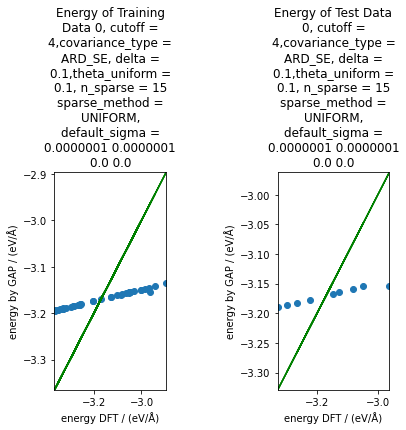

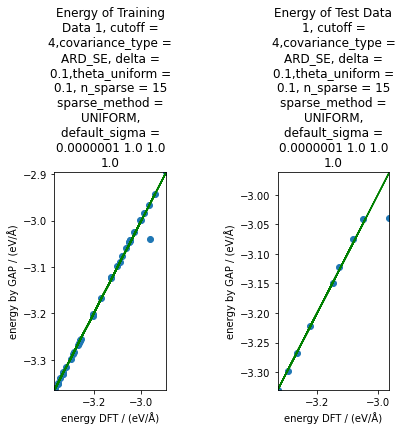

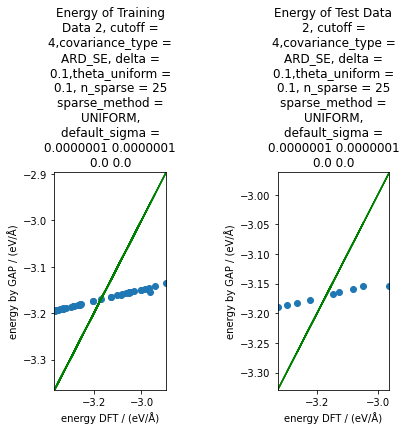

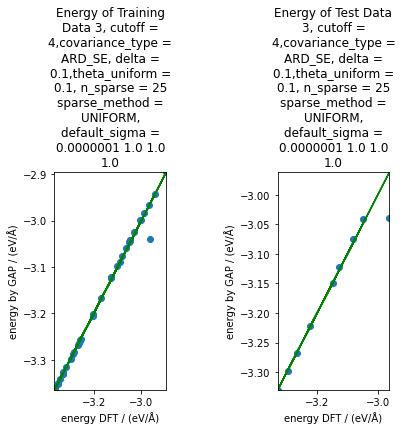

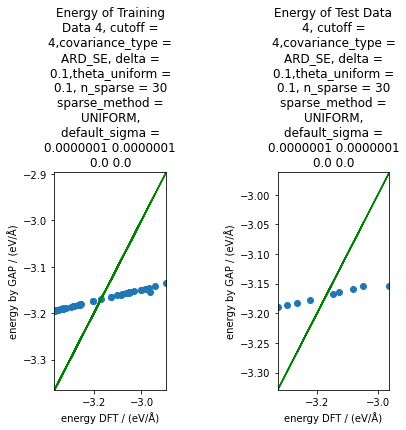

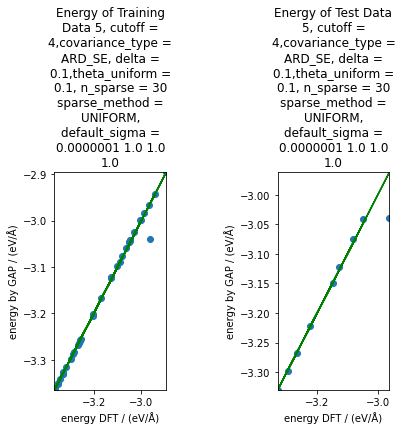

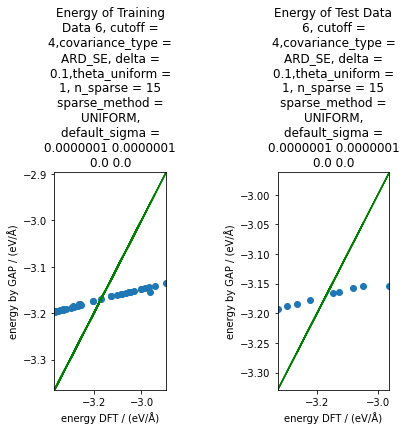

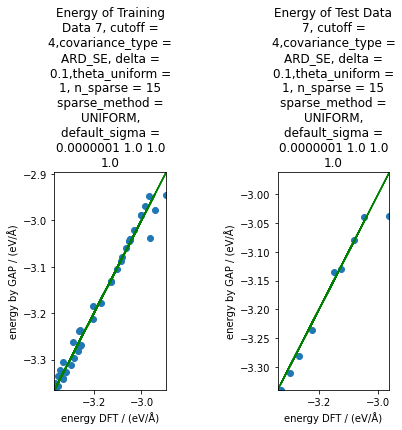

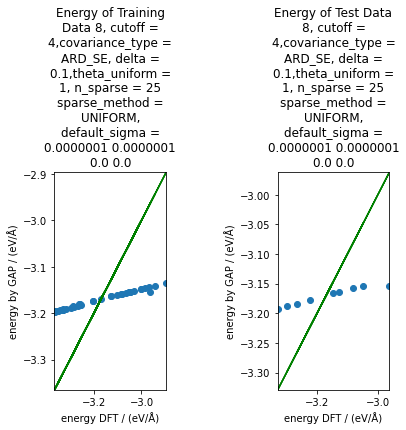

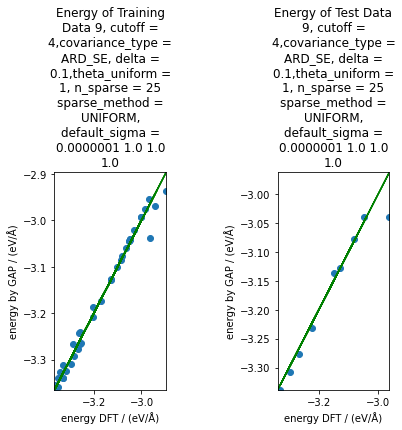

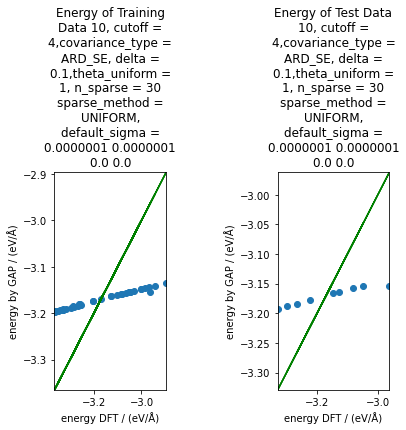

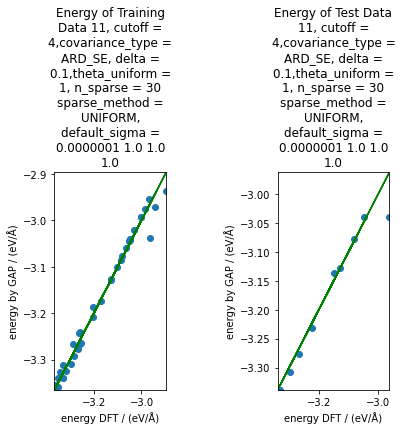

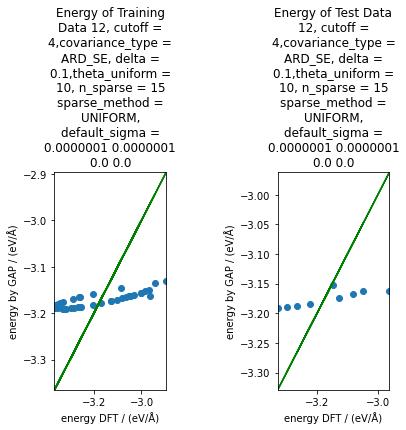

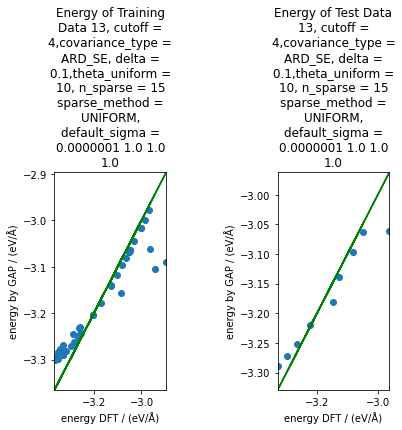

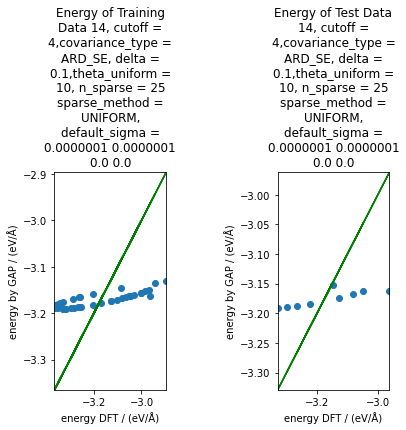

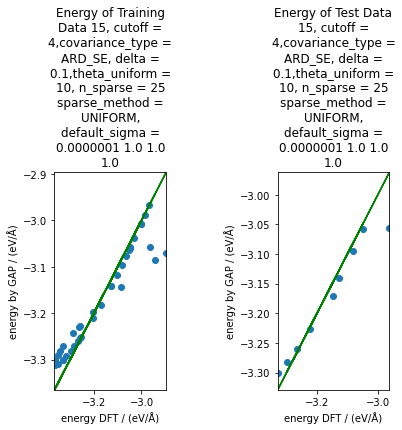

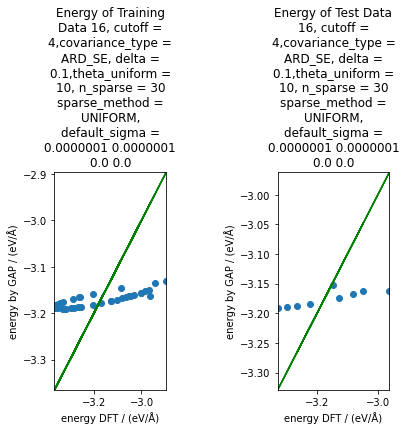

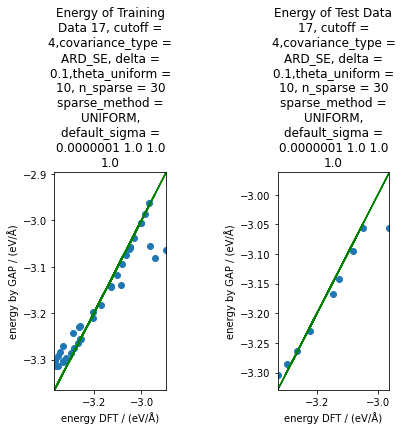

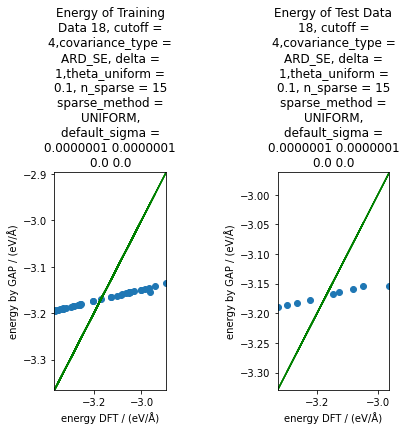

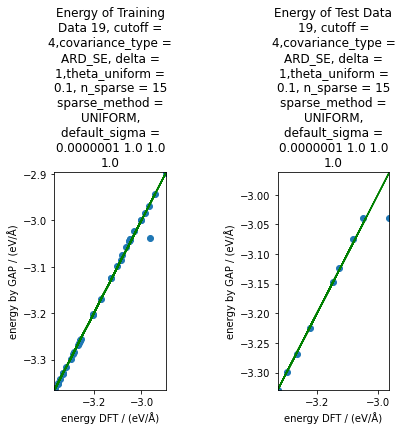

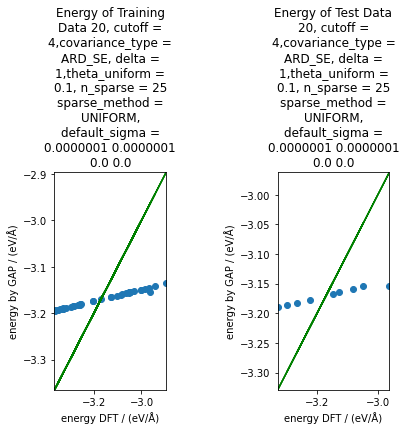

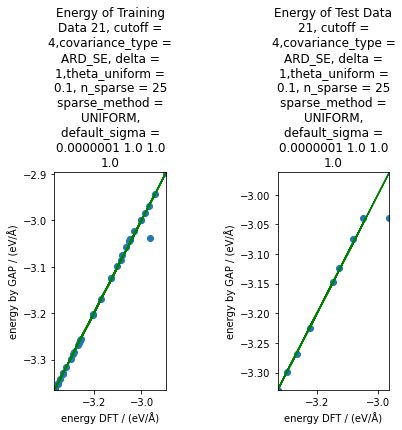

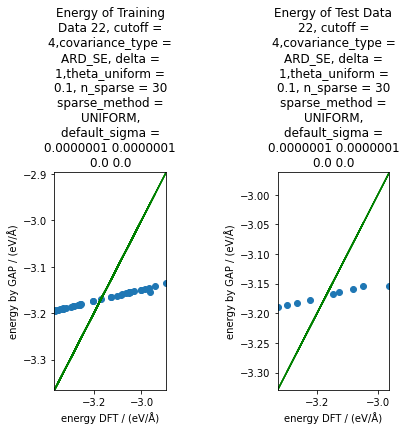

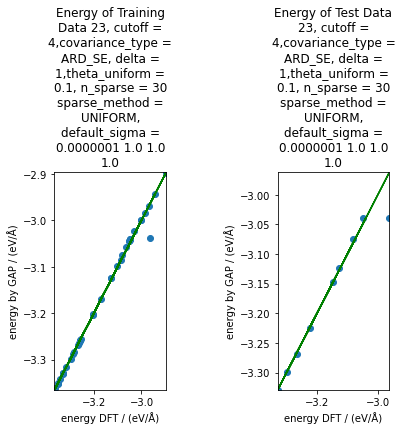

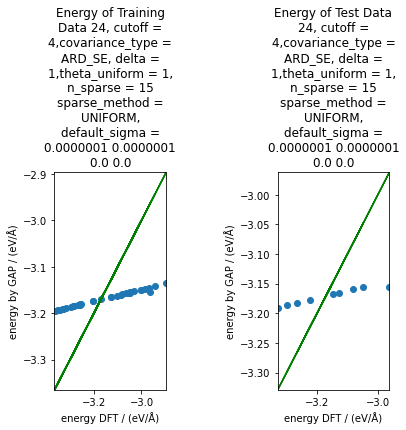

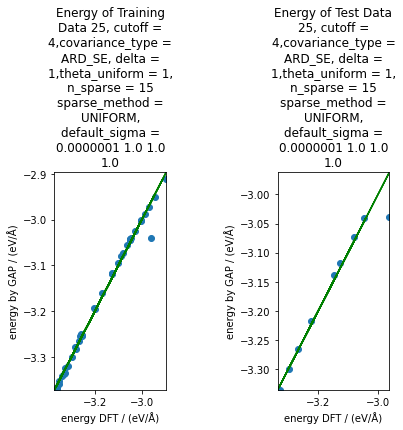

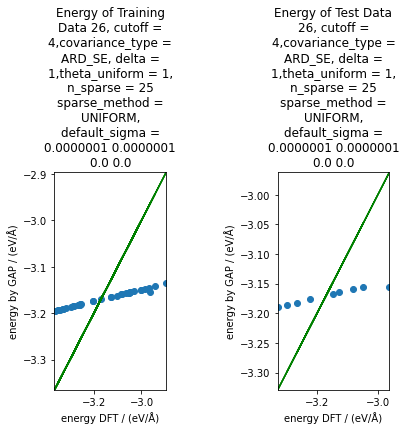

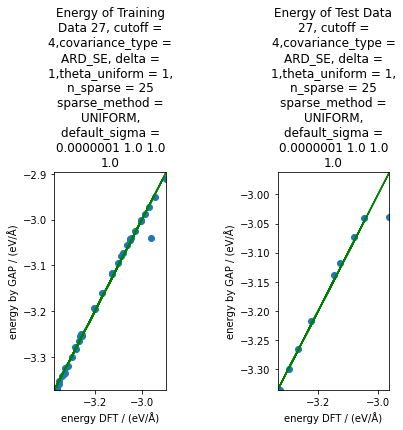

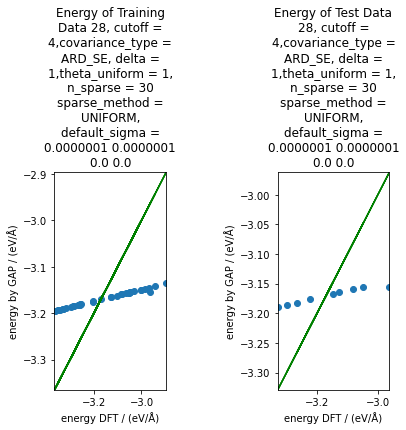

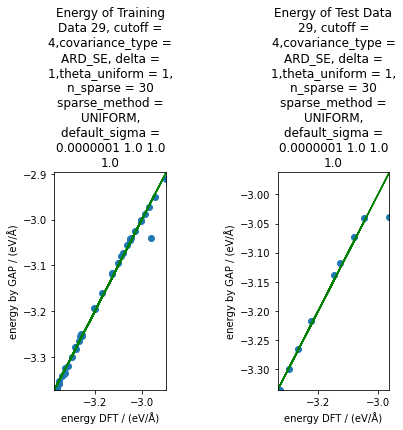

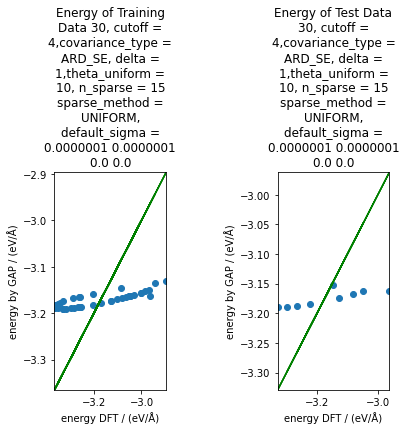

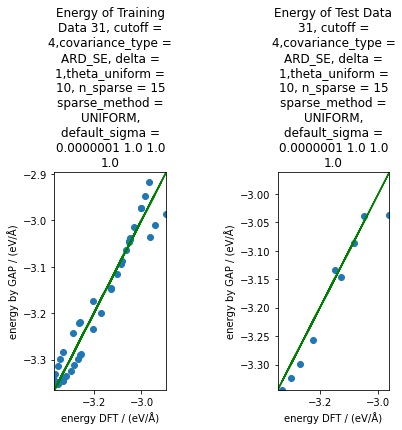

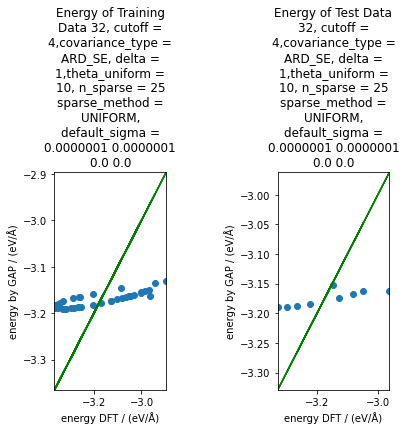

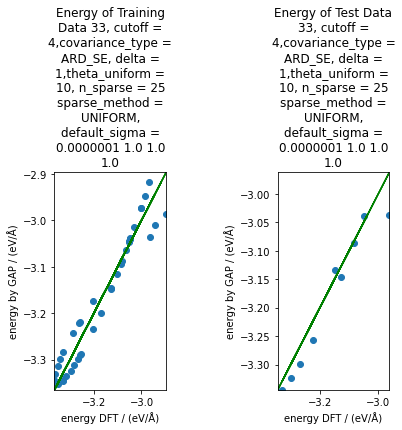

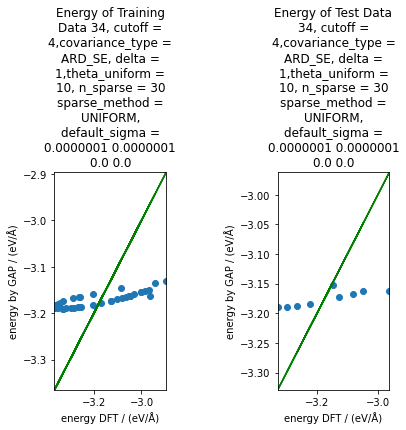

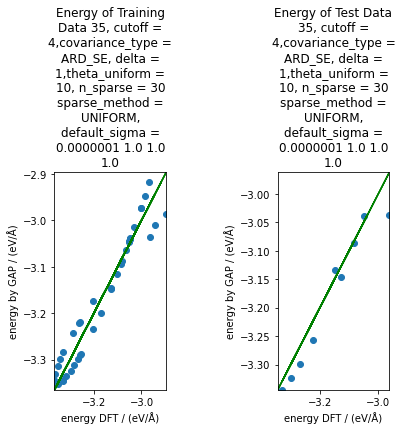

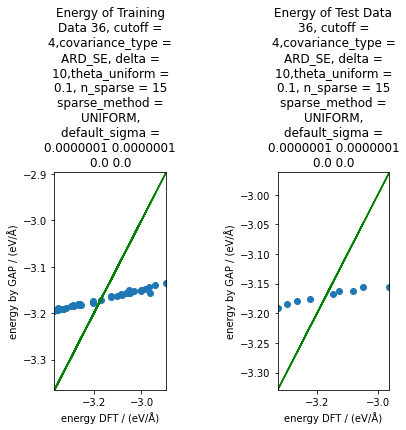

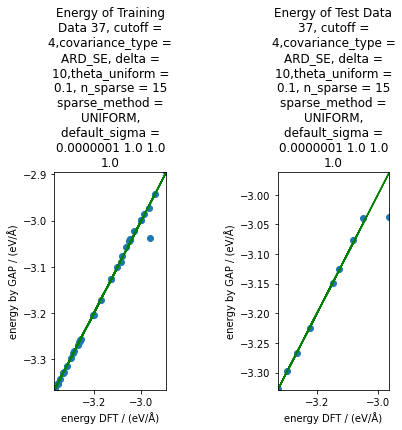

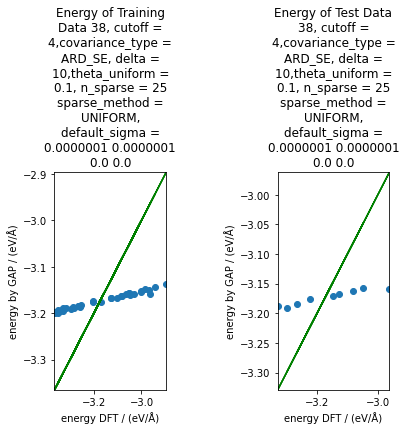

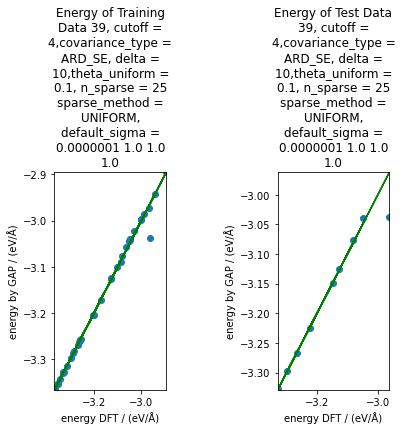

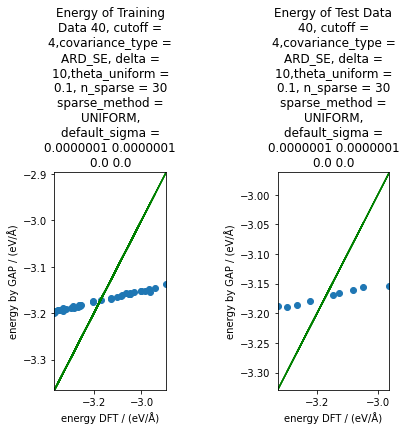

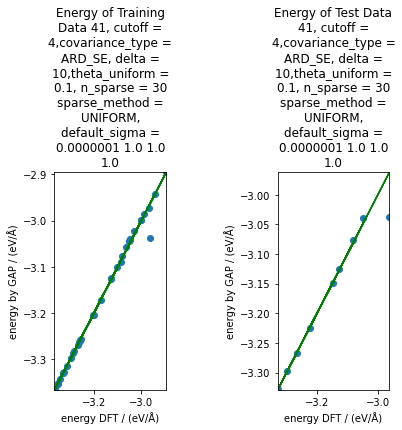

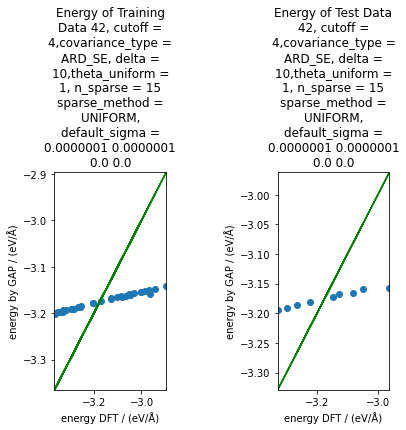

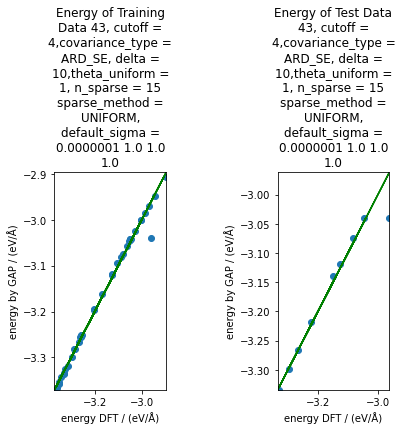

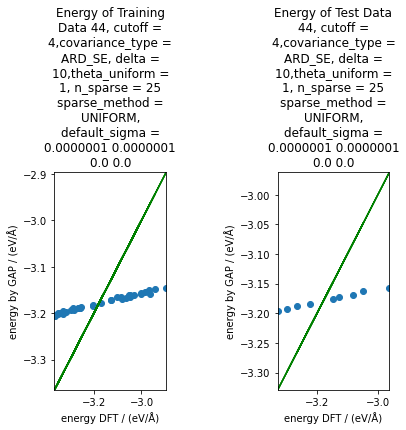

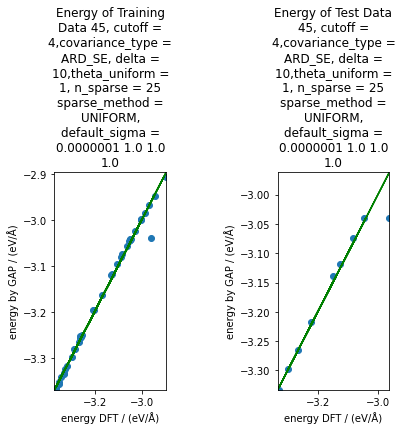

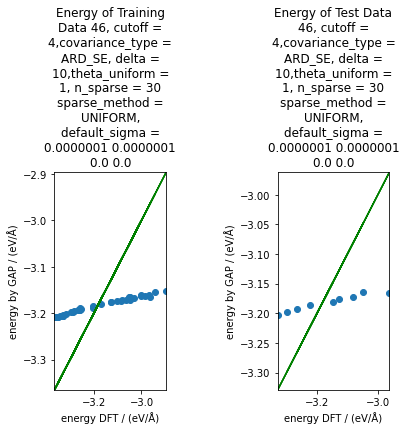

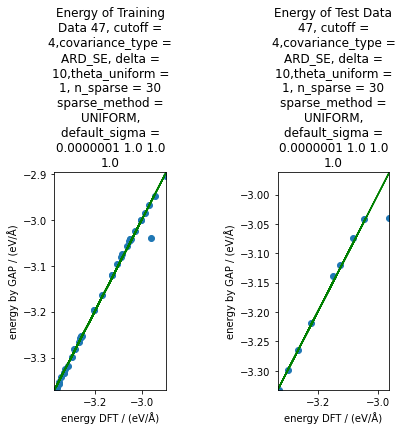

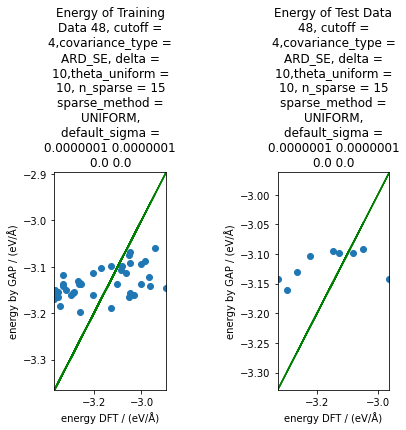

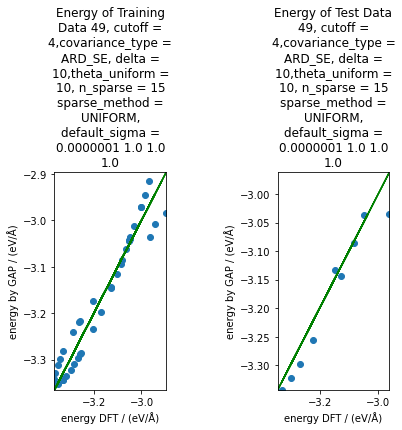

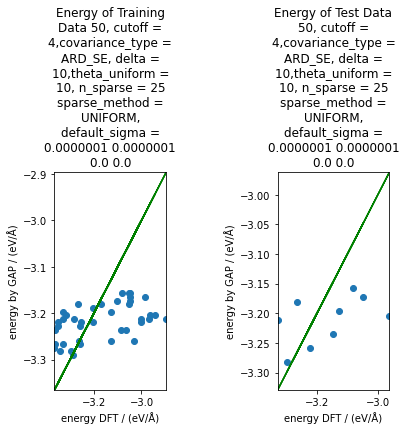

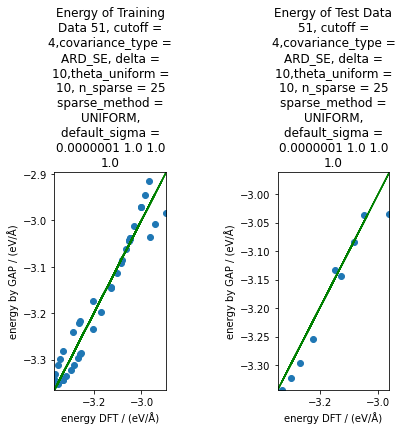

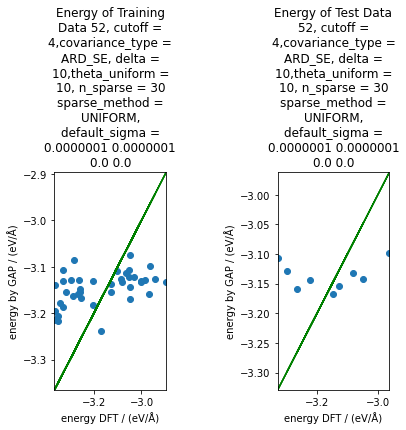

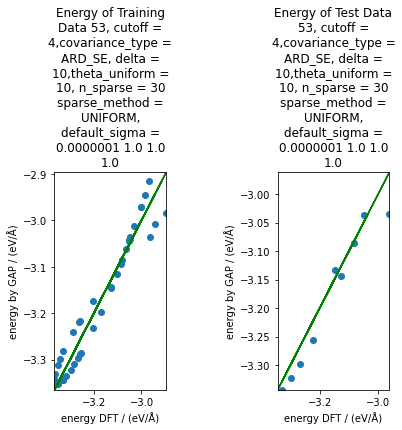

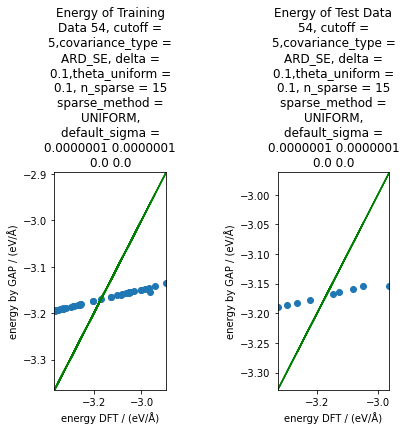

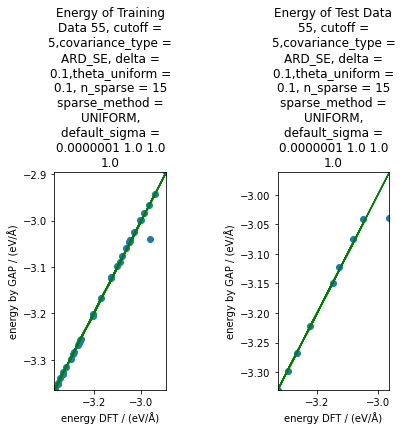

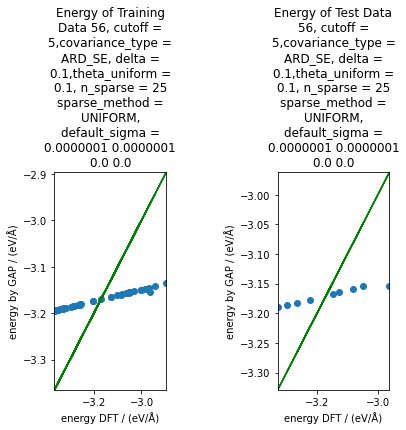

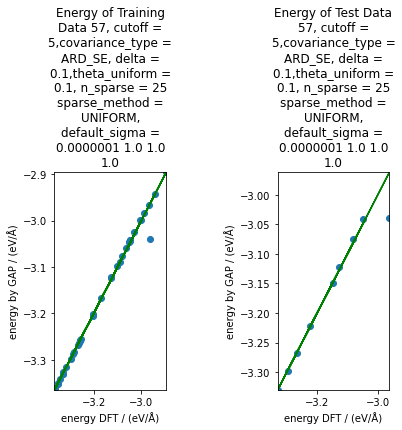

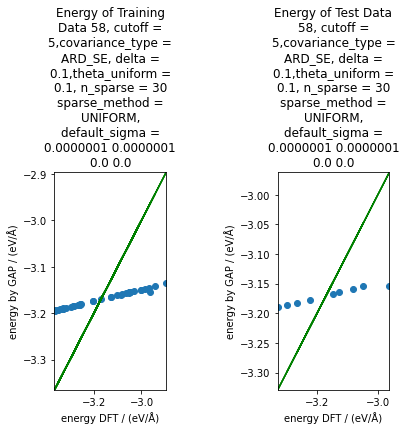

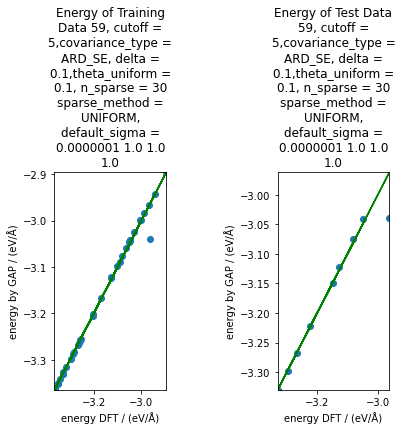

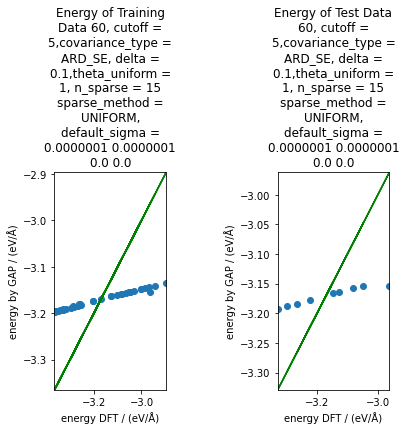

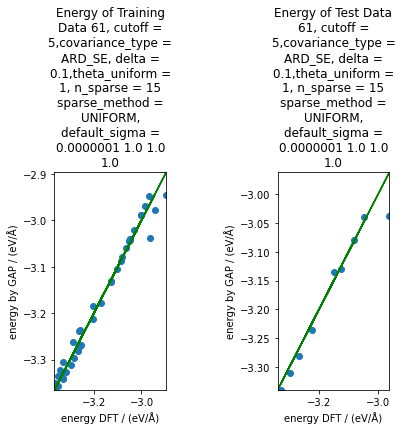

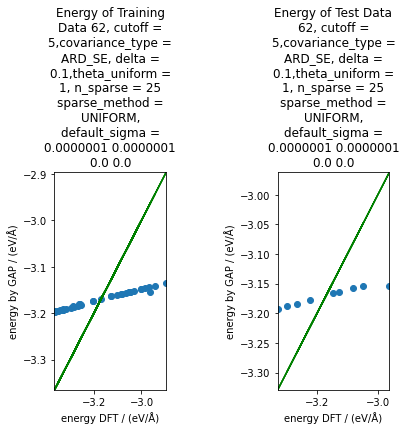

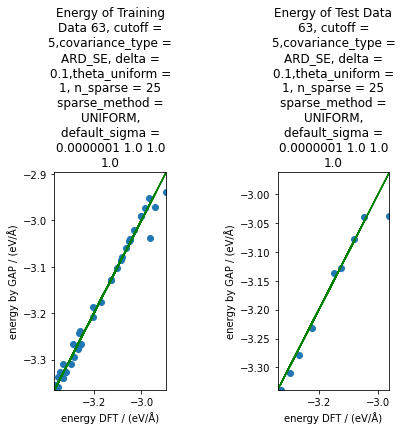

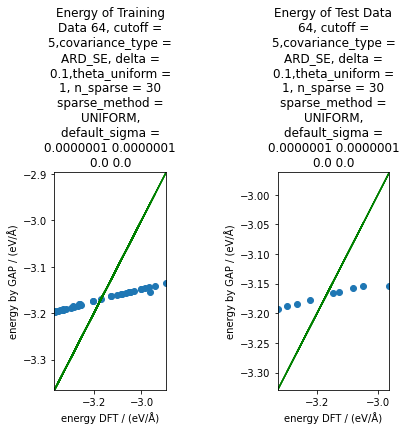

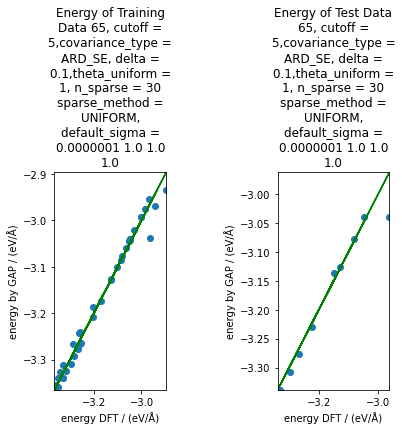

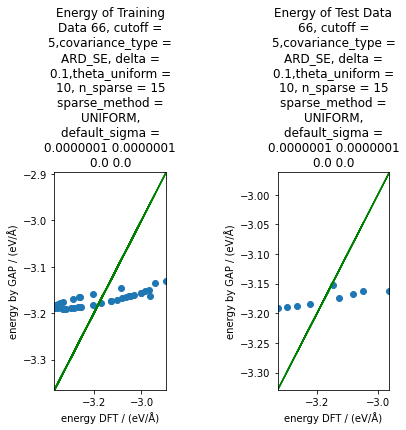

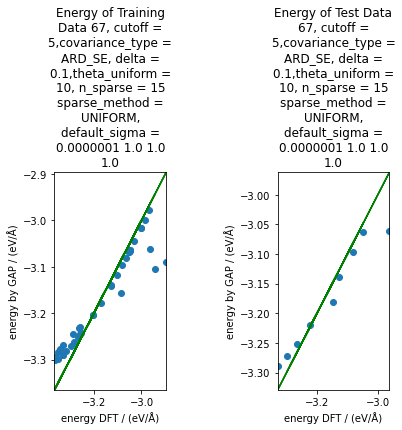

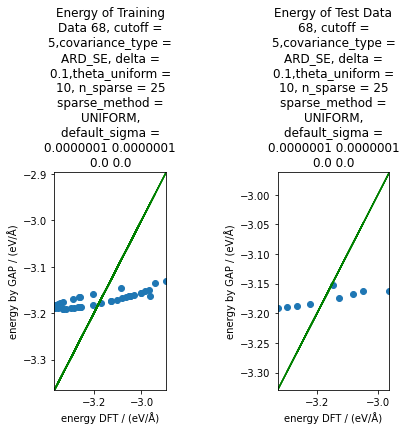

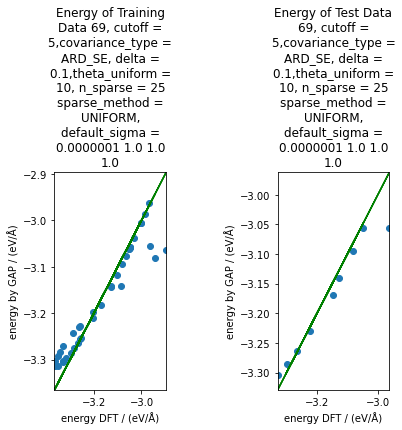

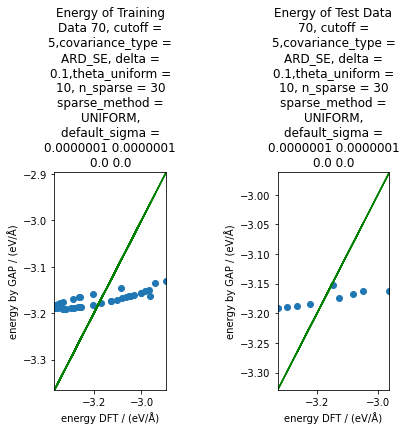

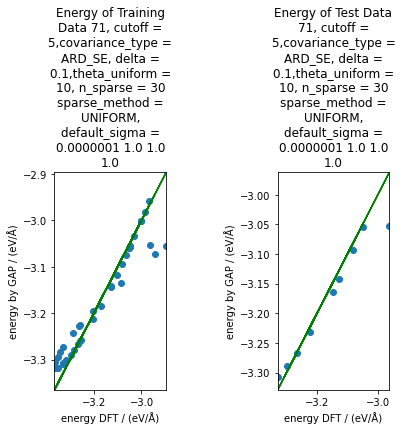

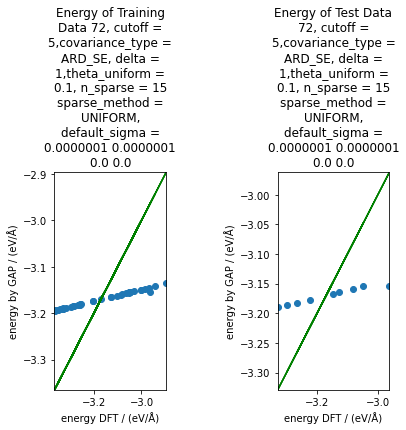

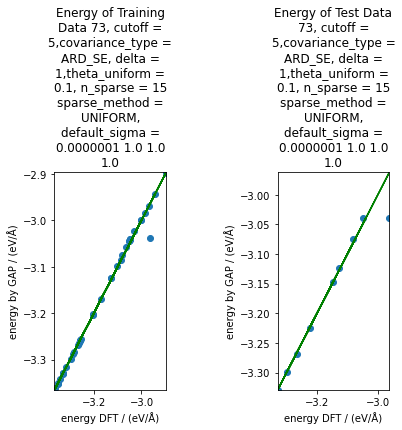

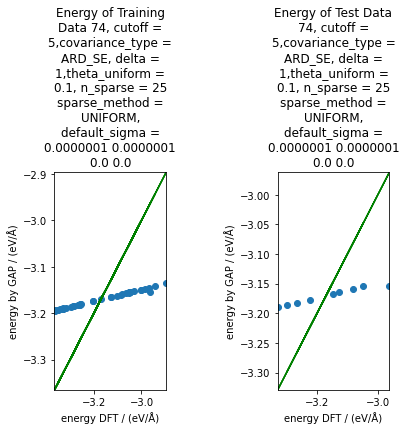

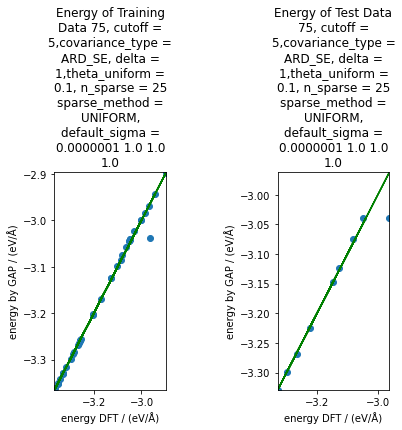

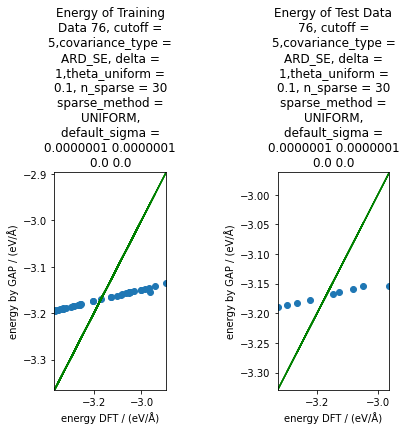

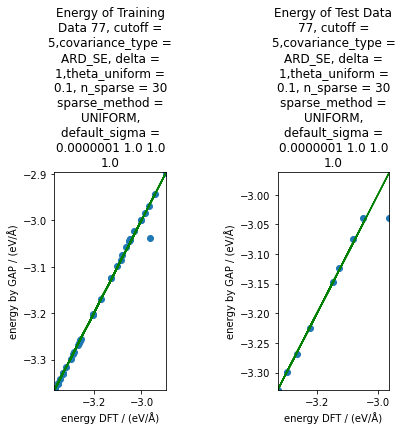

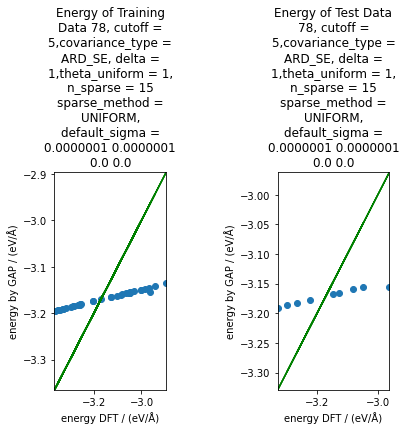

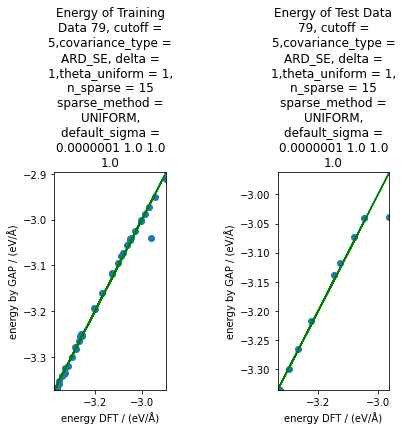

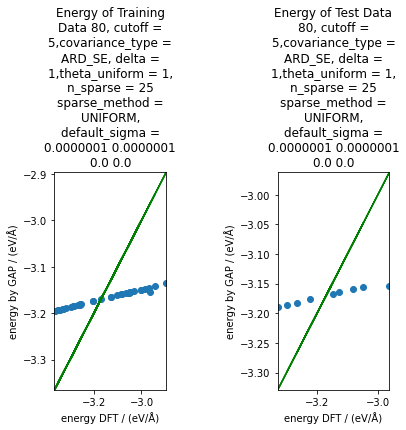

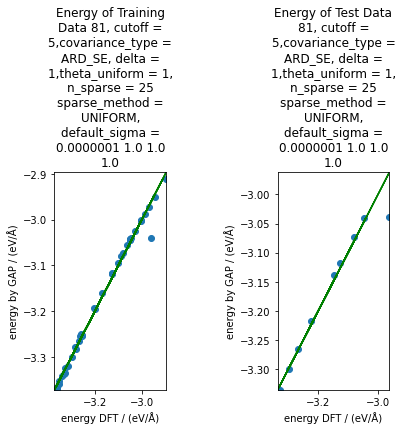

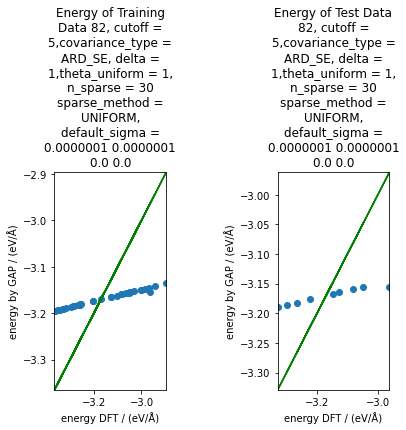

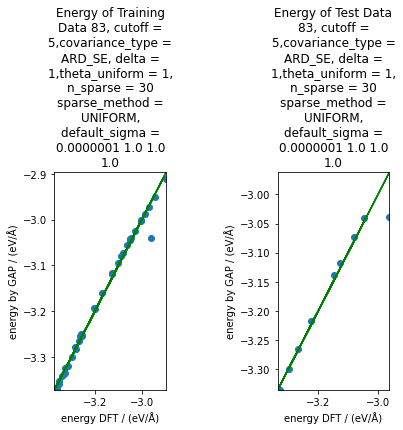

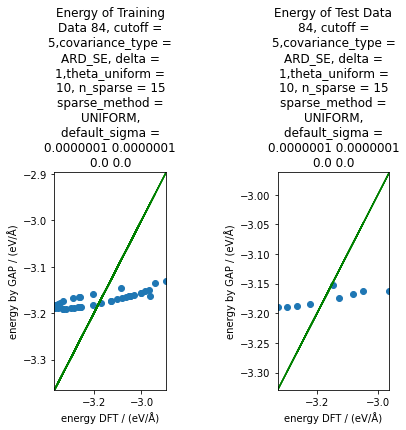

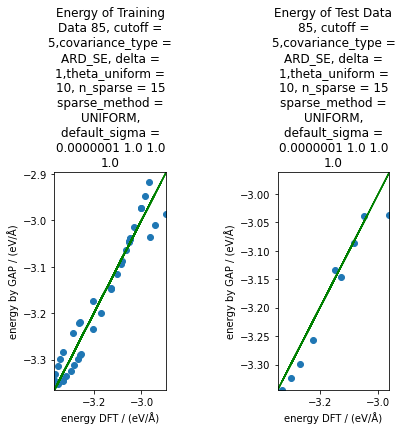

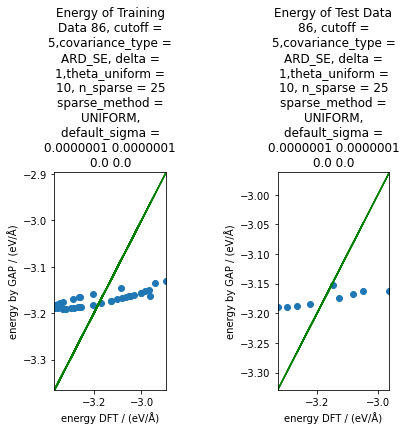

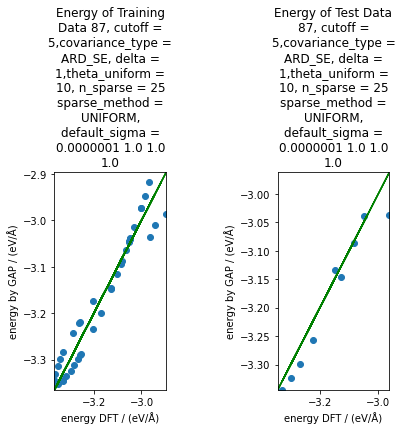

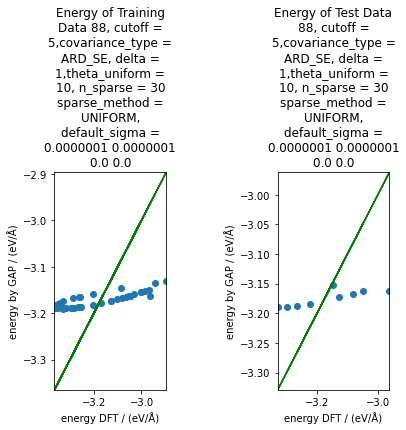

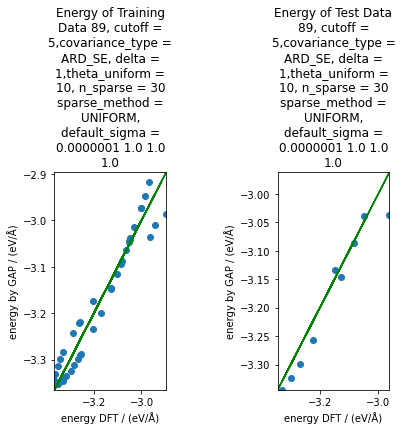

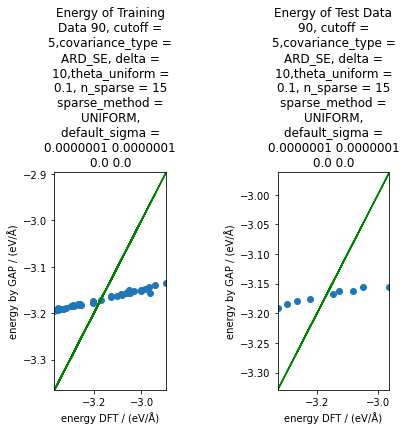

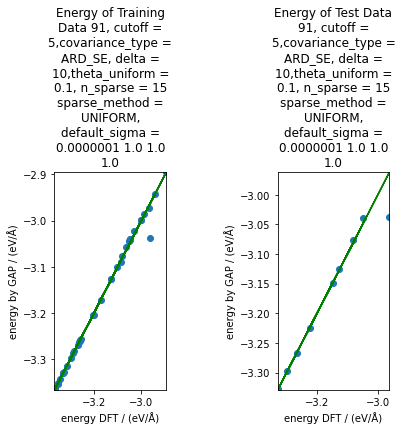

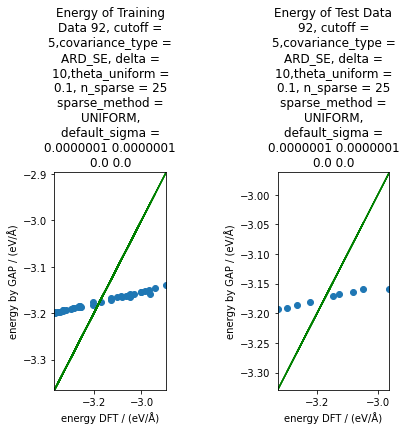

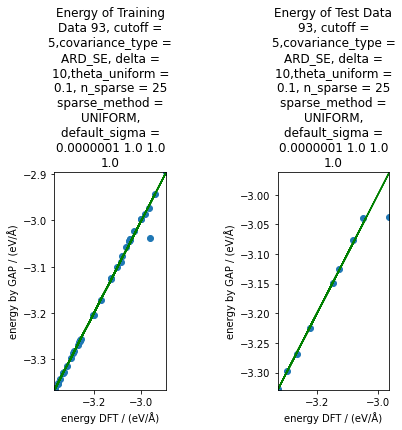

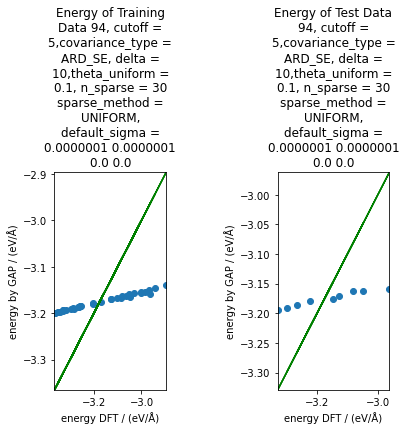

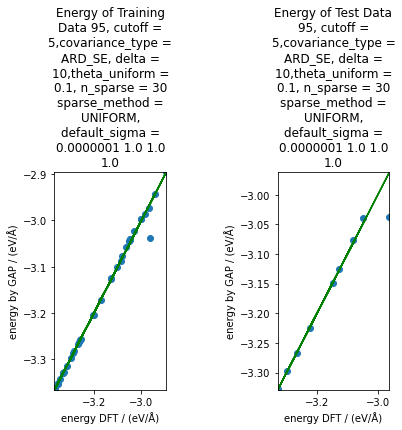

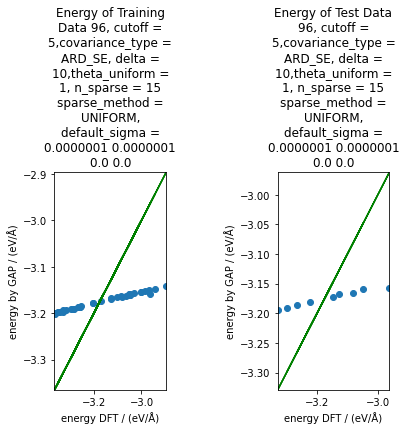

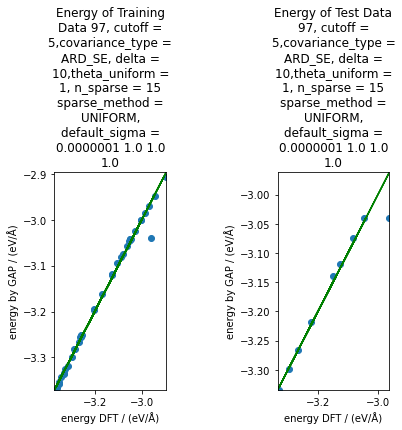

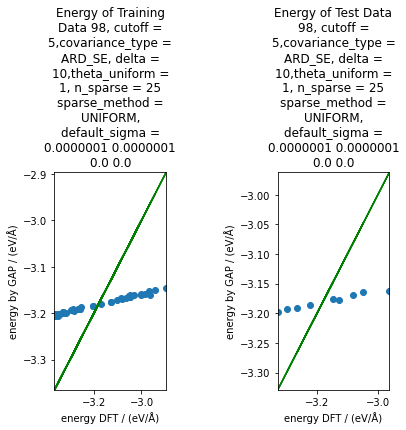

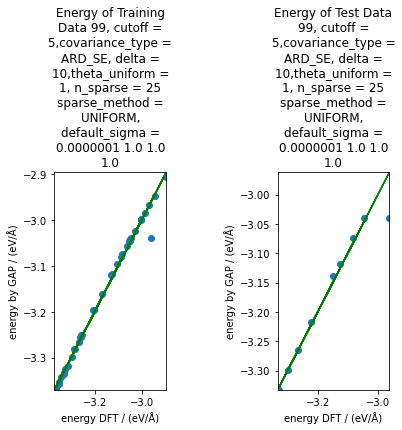

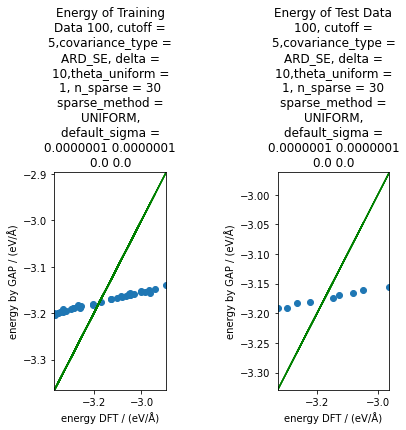

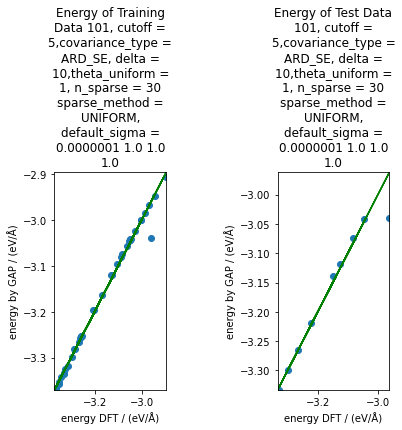

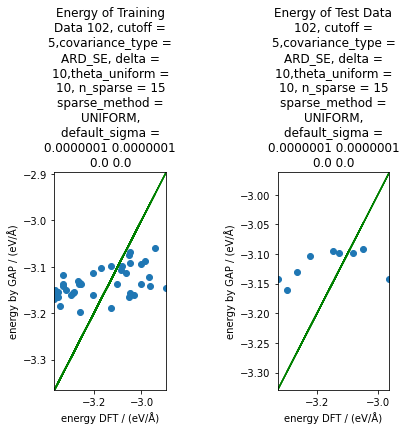

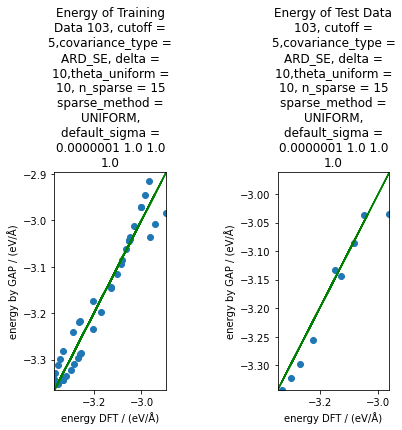

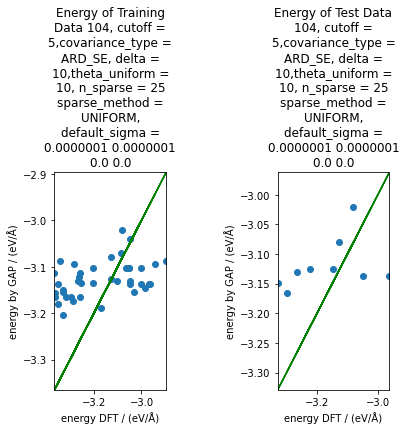

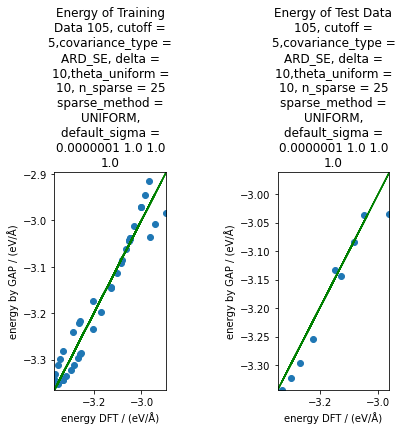

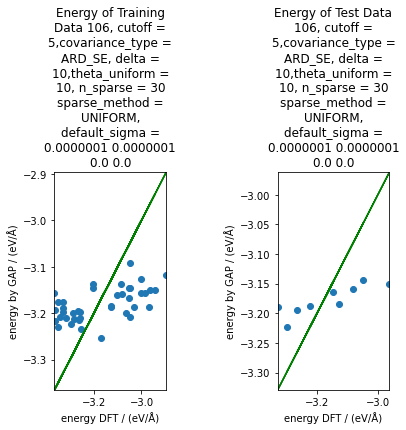

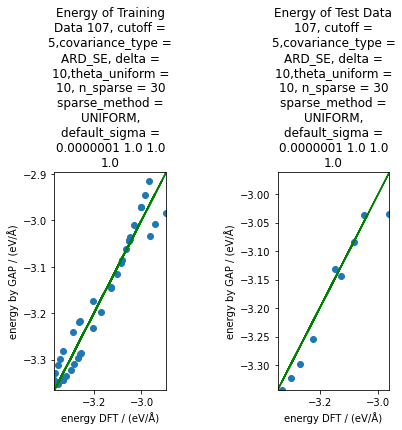

In [5]:
for i,(cut,cov,delta,theta,nsparse,sparse,sigma) in enumerate(comb):
    descriptor_2b = distance_2b(cutoff=cut, covariance_type=cov,delta=delta,theta_uniform=theta,
                                n_sparse=nsparse, sparse_method=sparse,add_species='T')
    # Make model
    model = GAPModel()
    
    # Select filename in which potential should be stored 
    potential=f"GAP{i}.xml"
    
    # Get descriptor parameter string
    parameters = descriptor_2b.get_parameter_string()
    # Train model
    model.train(parameters, training_data=train_file,GAP_potential=potential,sigma=sigma,print_output=True)
    
    # Select filename in which predictions should be stored for train data 
    prediction_train = f"quip_2b_train{i}.xyz"
    
    # Predict energies on training data
    model.predict(Test_Data=train_file, GAP_potential=potential, QUIP_Prediction=prediction_train,print_output=True)
    
    # Select filename in which predictions should be stored for test data 
    prediction_test = f"quip_2b_test{i}.xyz"

    # Predict energies on test data
    model.predict(Test_Data=test_file, GAP_potential=potential, QUIP_Prediction=prediction_test)
    
    # Plot ennergies to see quality of the fit
    plot = QualityPlot()
    
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})
    
    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=train_file, predicted_values=prediction_train, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data {i}, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
                             
    
    # Plot predicted energies of test data against real energies of test data
    plot.energies_on_energies(real_values=test_file, predicted_values=prediction_test, 
                            axis=axs[1], 
                            title="\n".join(wrap(f"Energy of Test Data {i}, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    
    
   
    
    

<ipython-input-6-8fc8e6b764dd>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


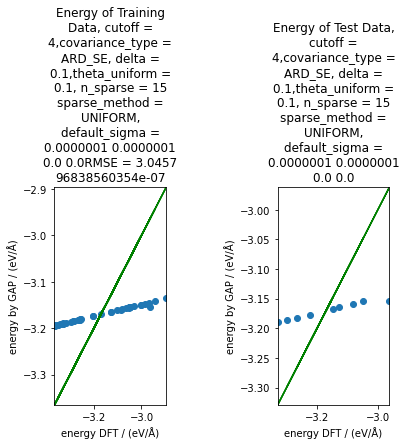

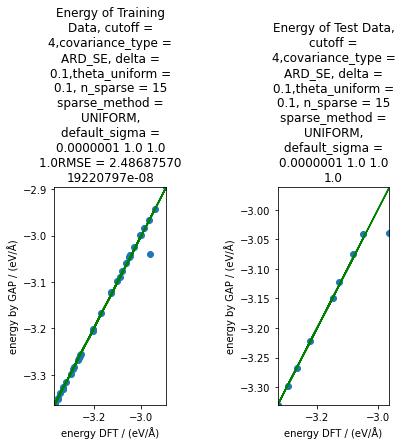

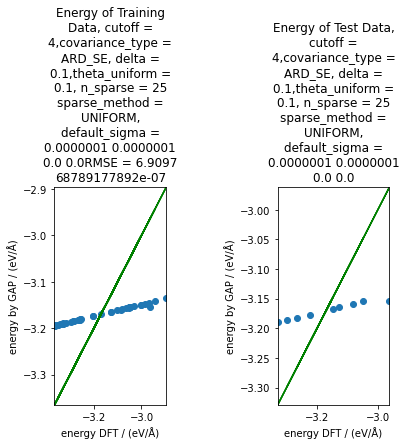

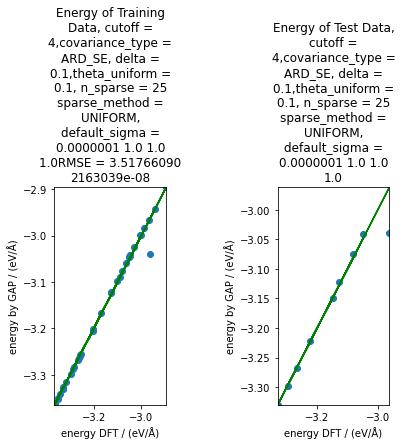

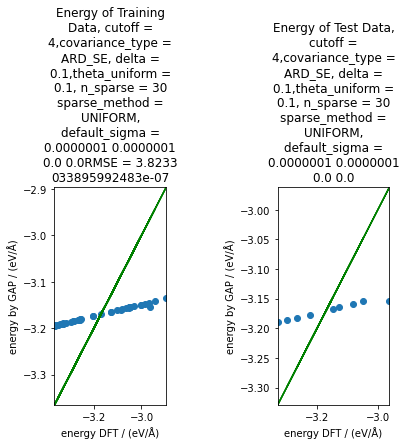

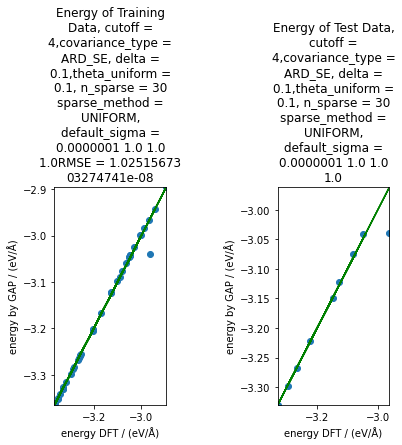

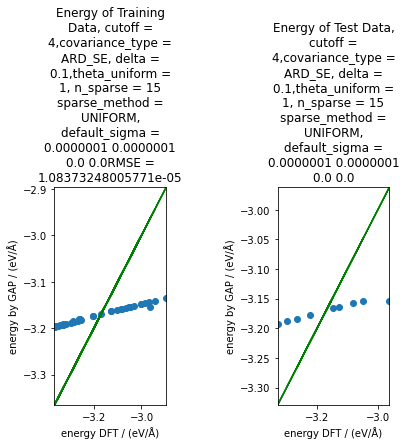

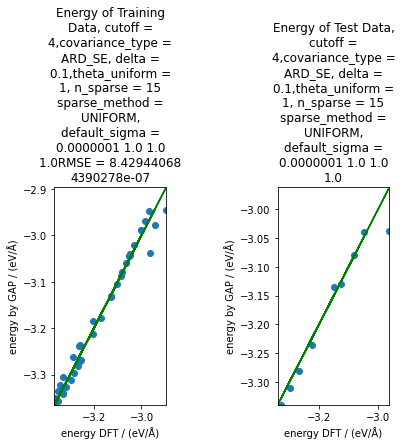

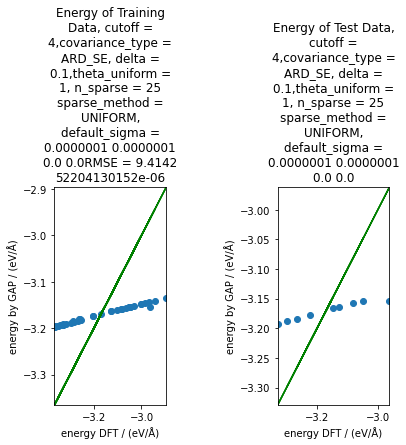

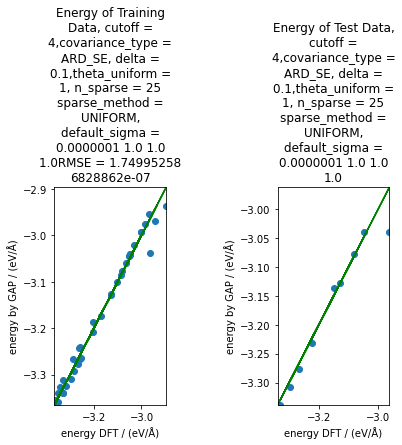

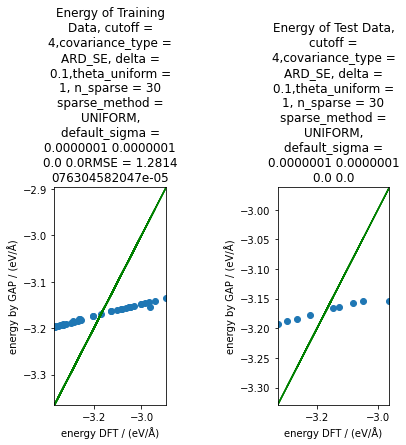

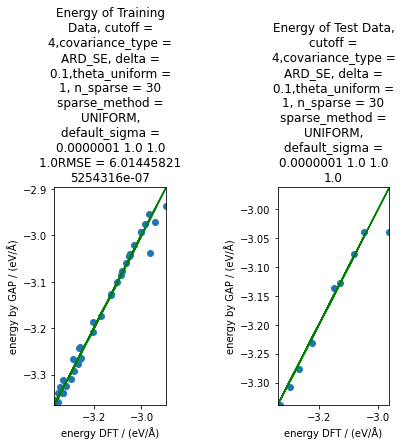

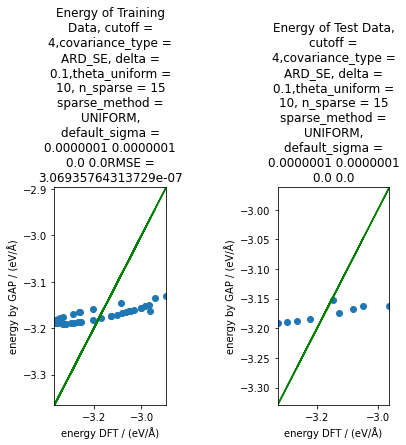

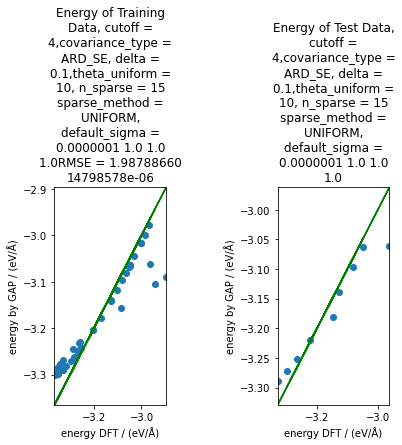

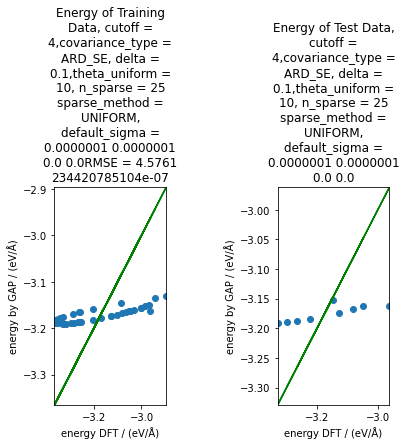

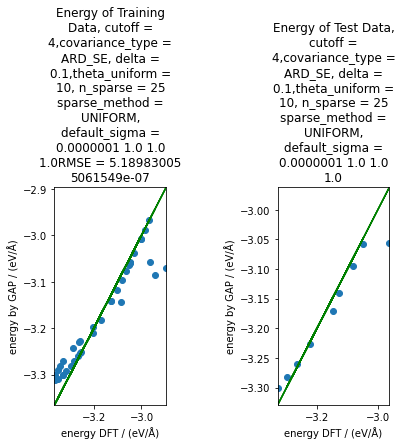

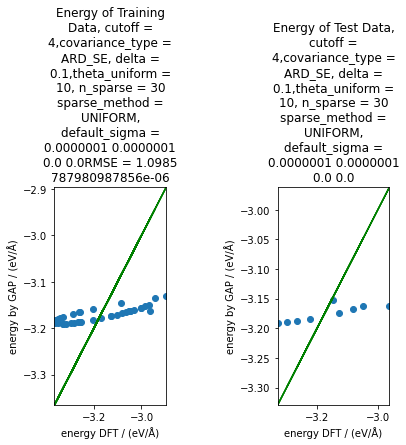

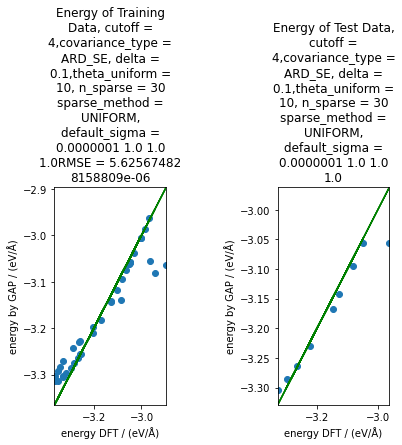

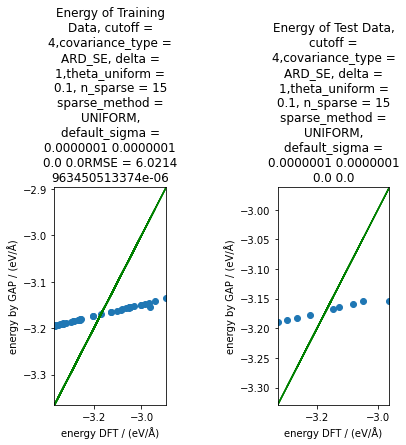

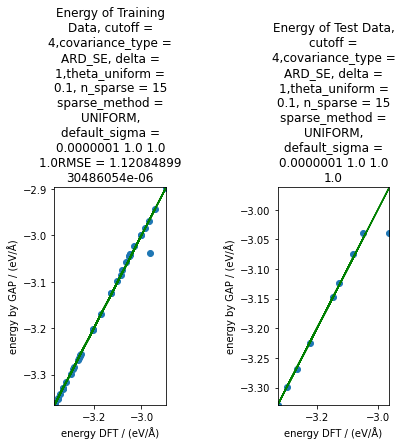

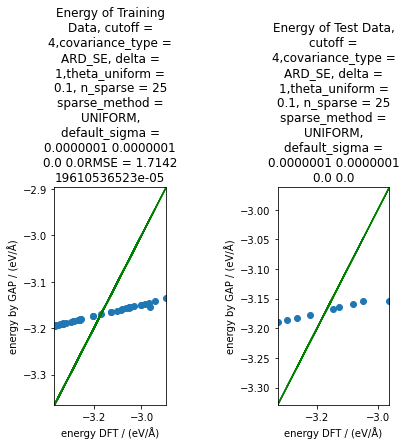

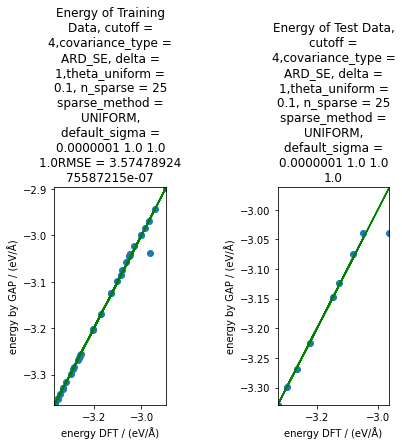

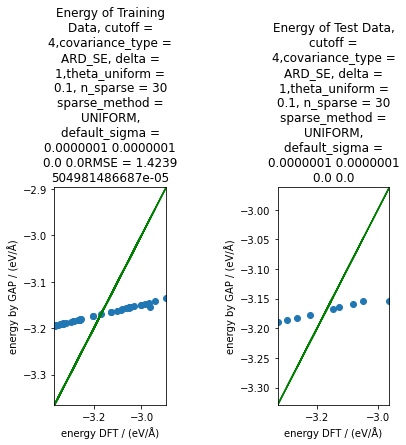

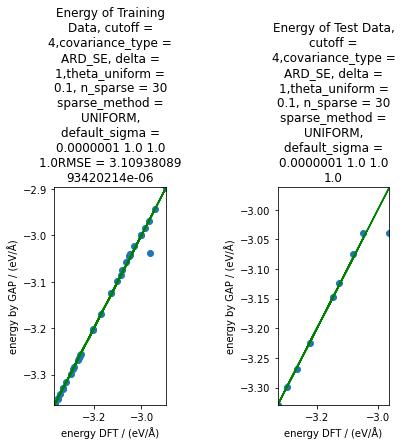

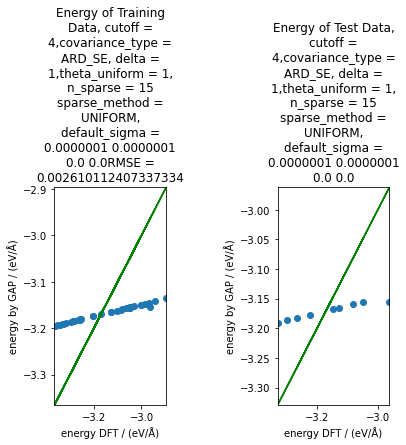

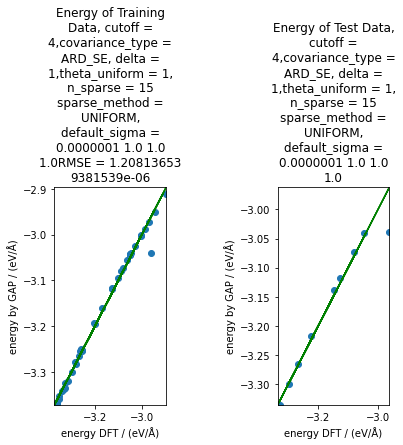

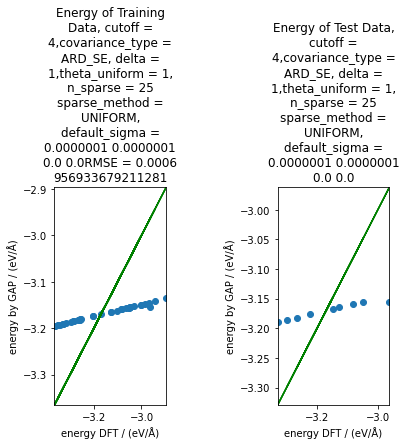

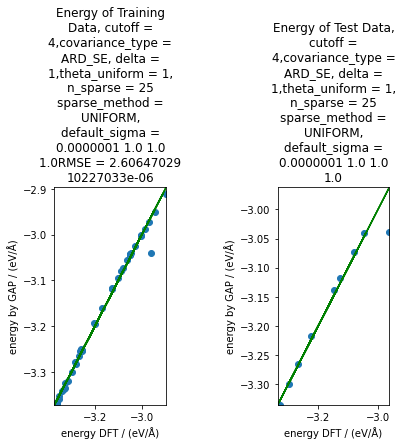

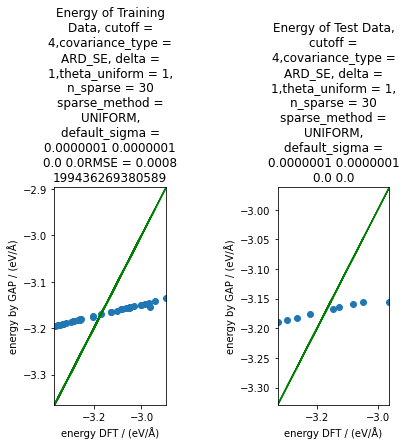

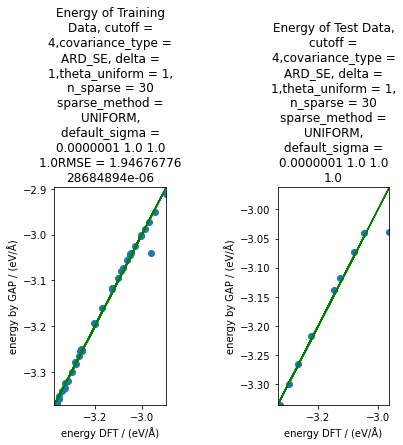

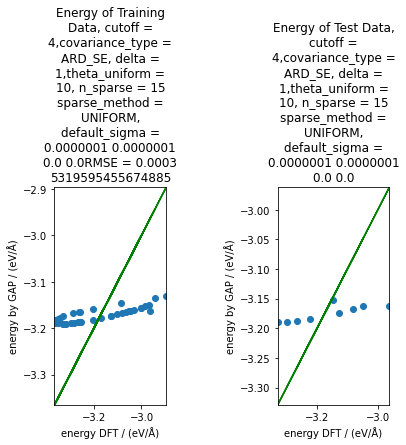

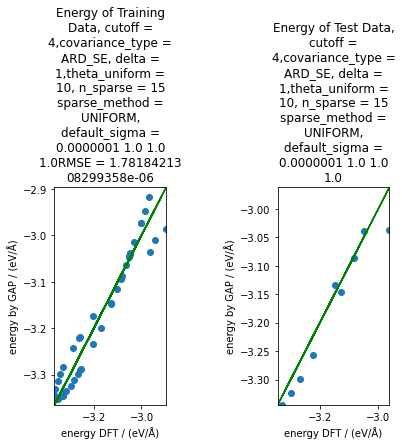

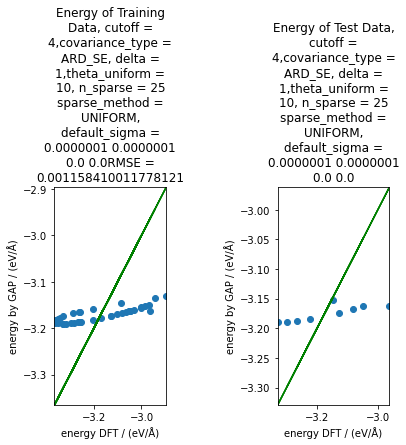

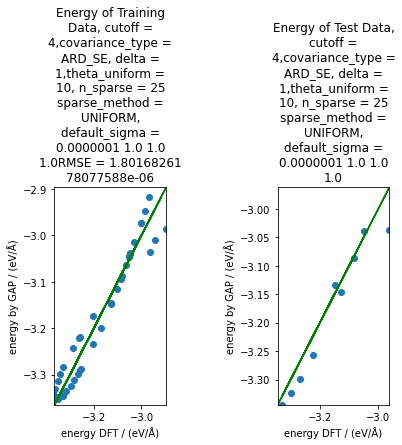

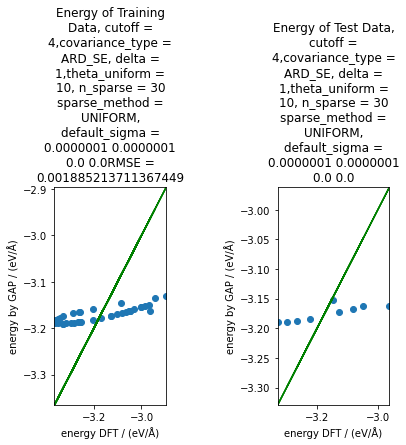

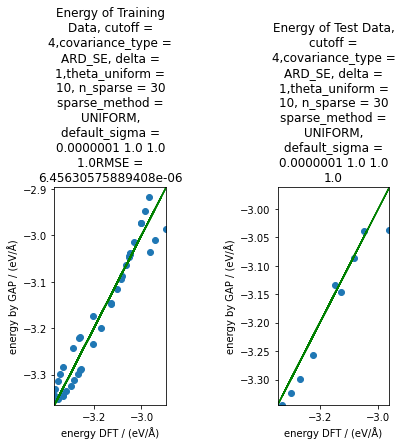

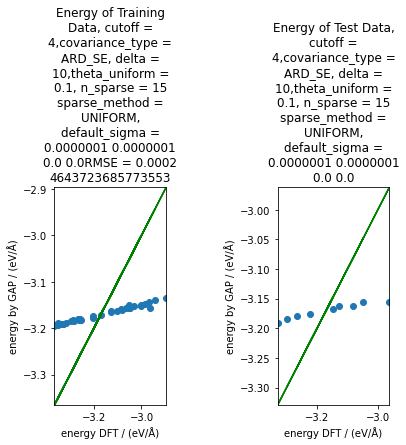

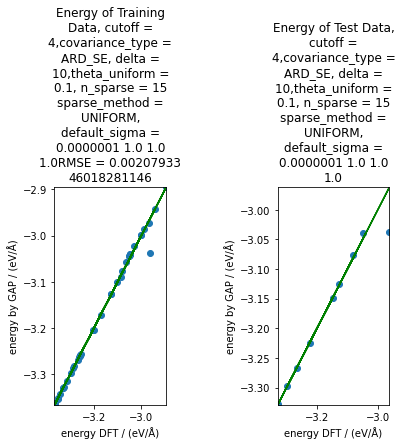

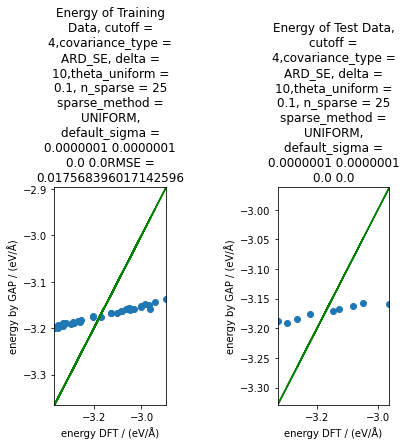

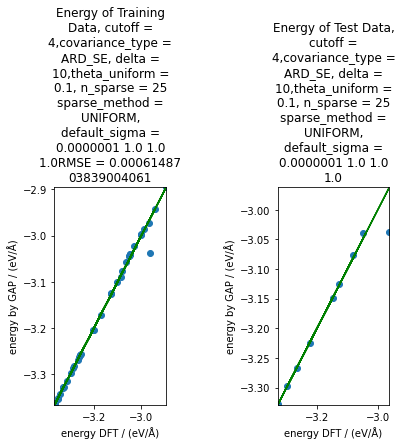

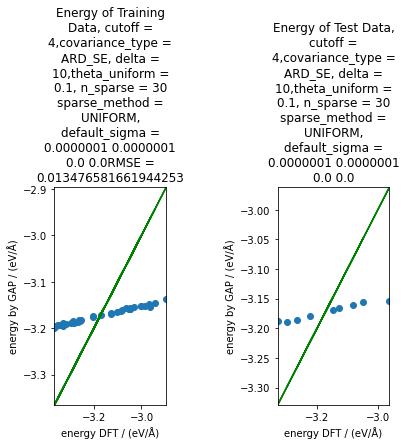

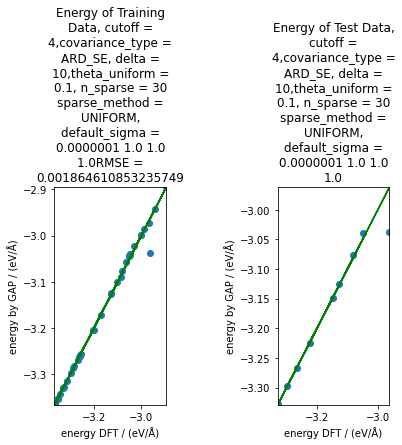

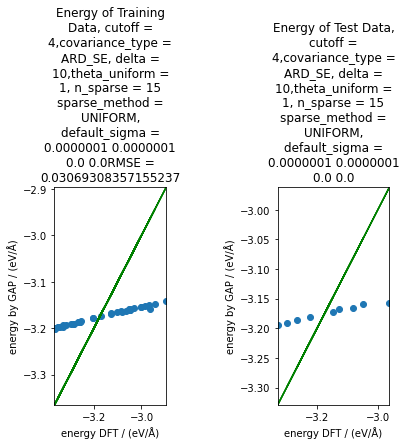

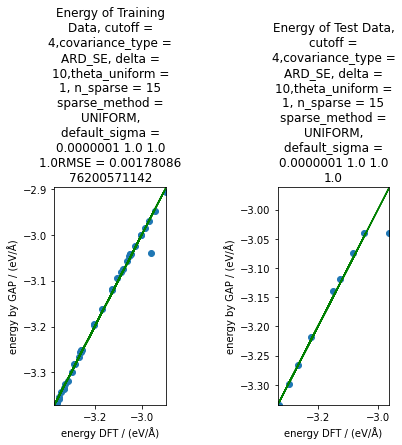

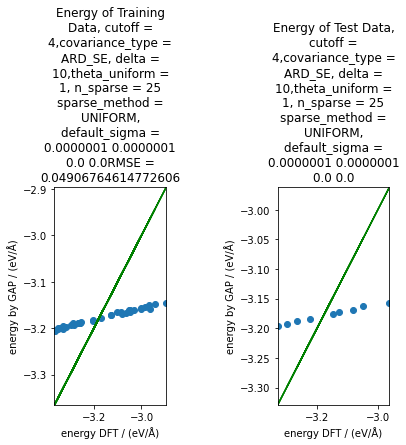

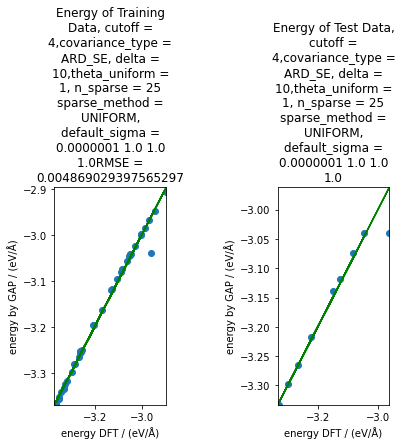

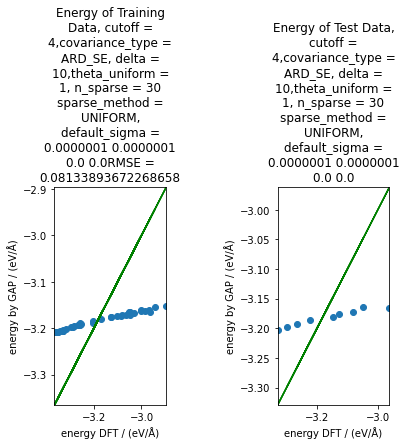

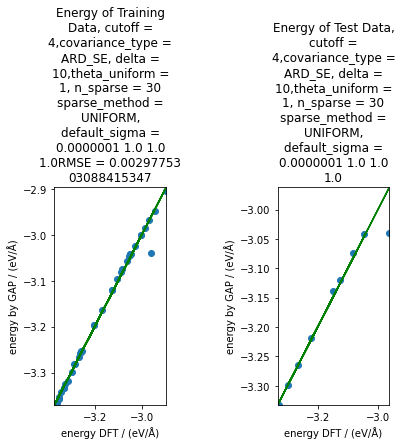

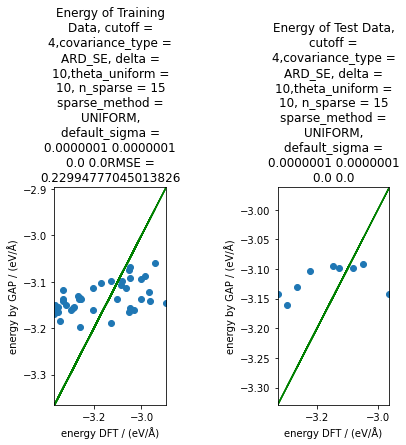

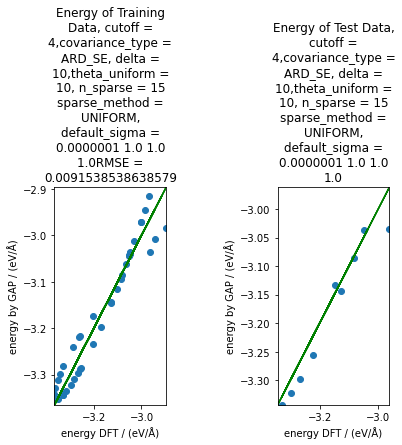

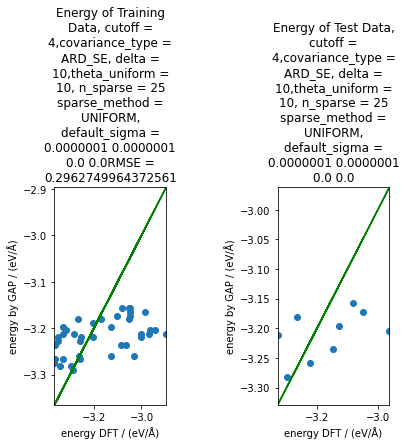

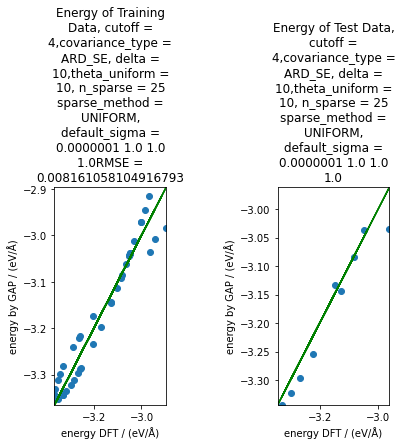

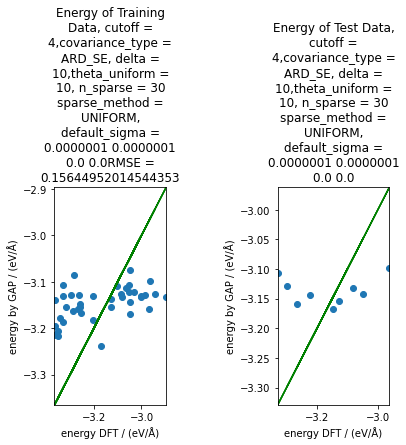

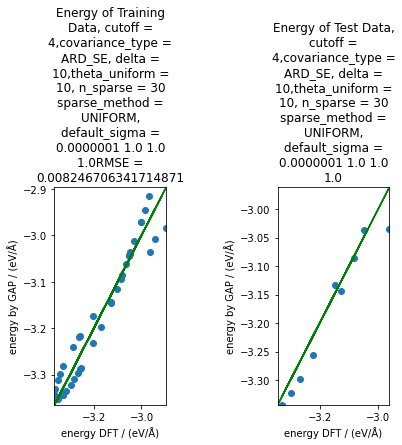

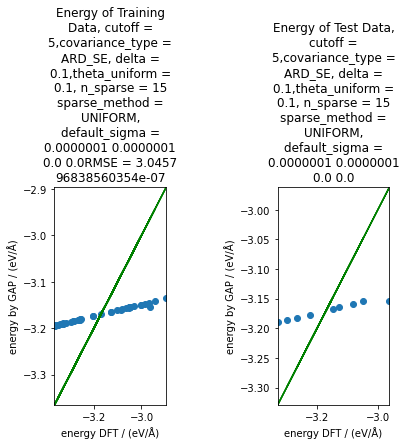

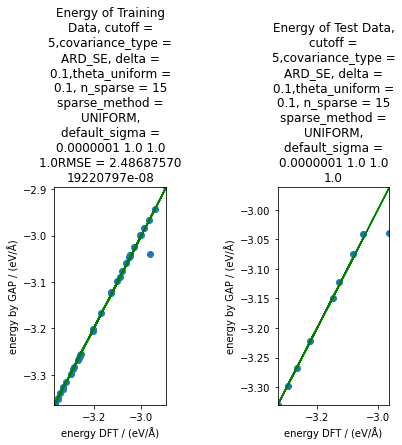

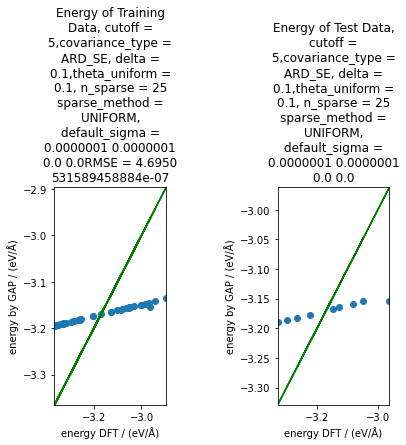

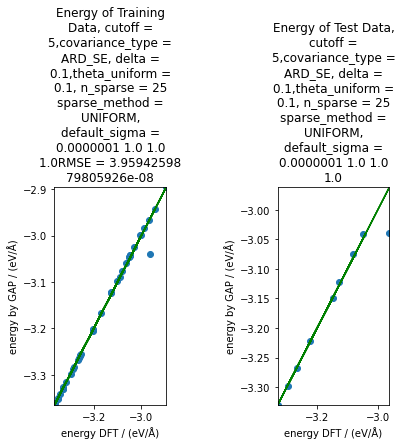

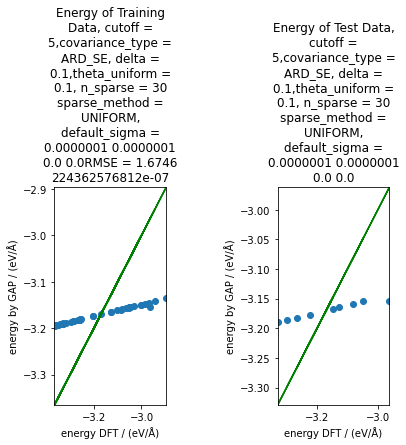

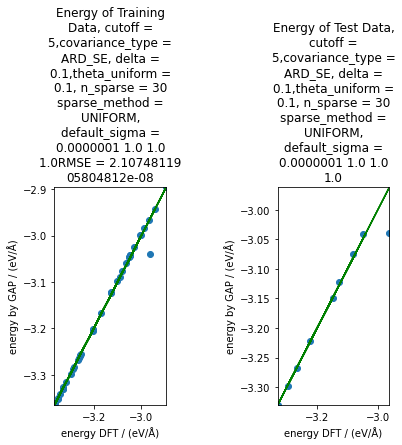

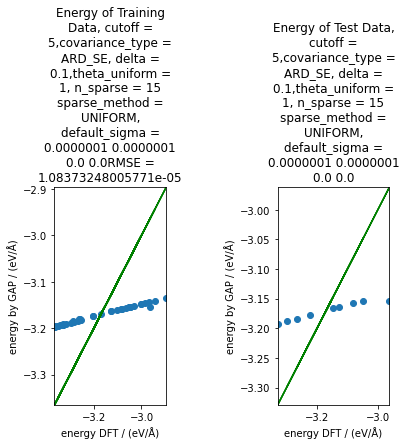

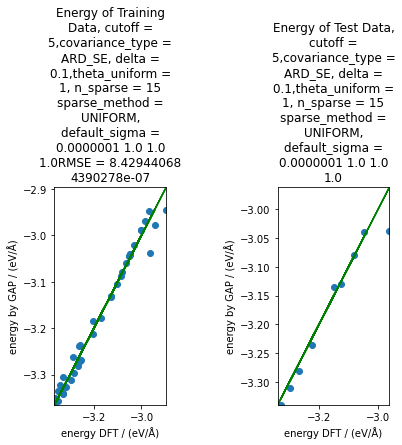

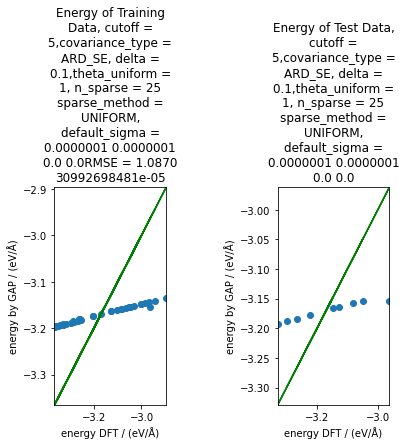

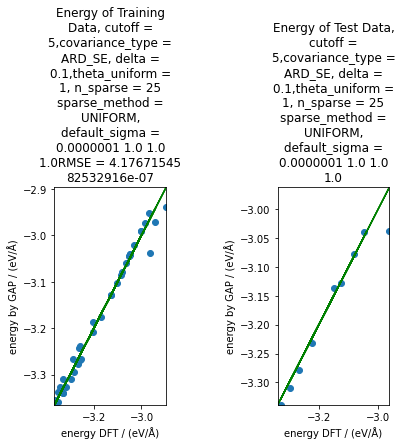

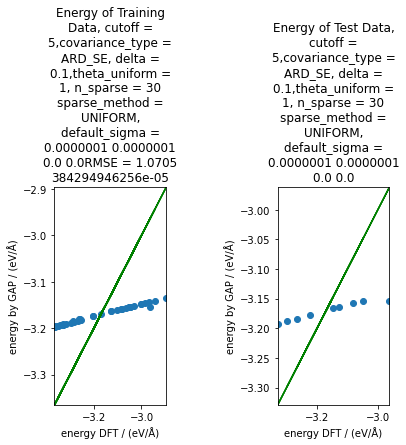

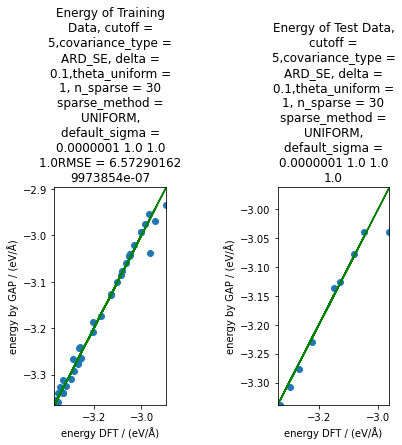

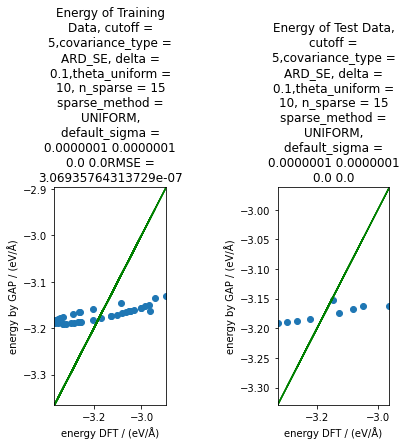

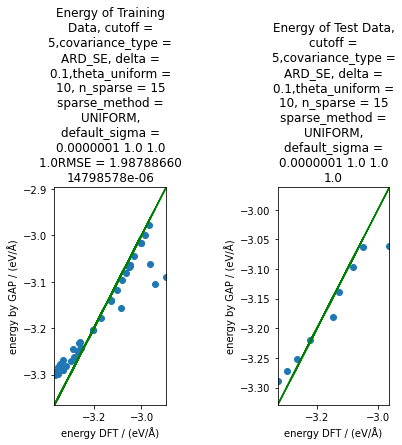

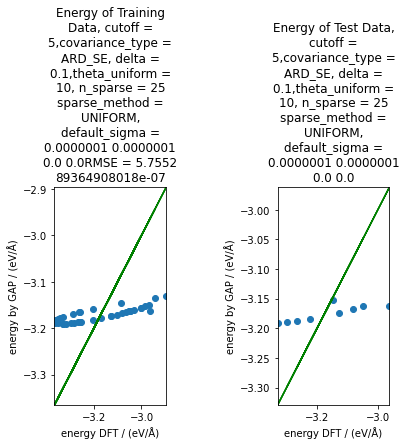

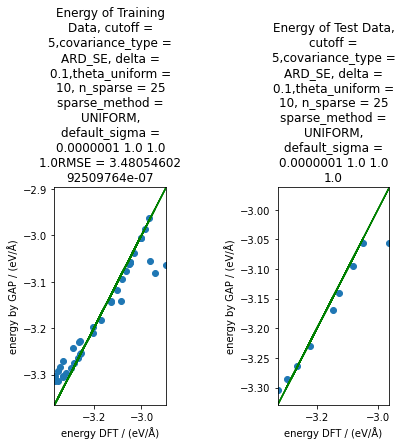

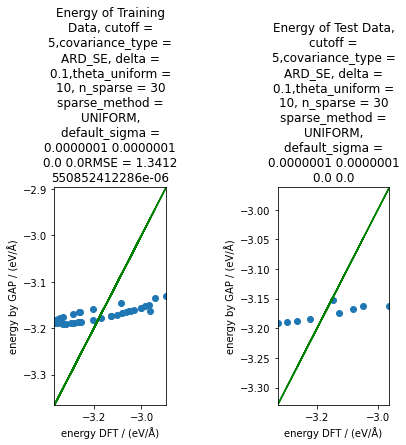

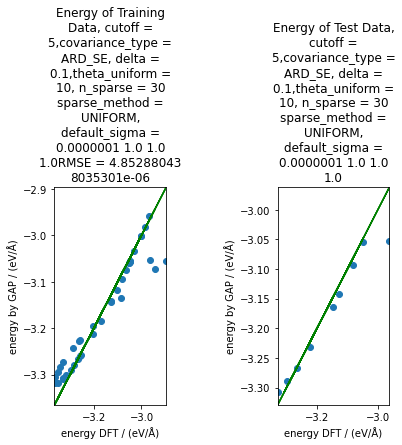

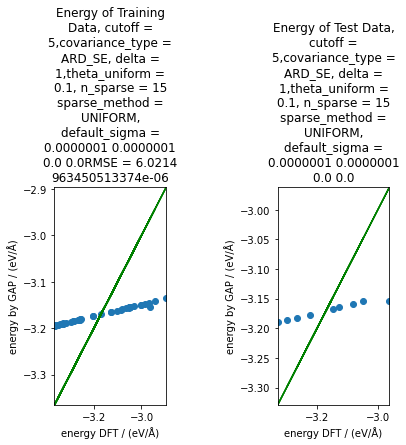

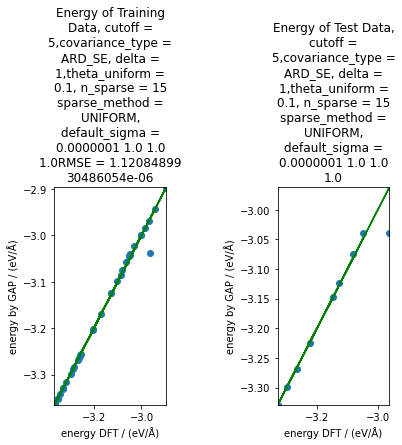

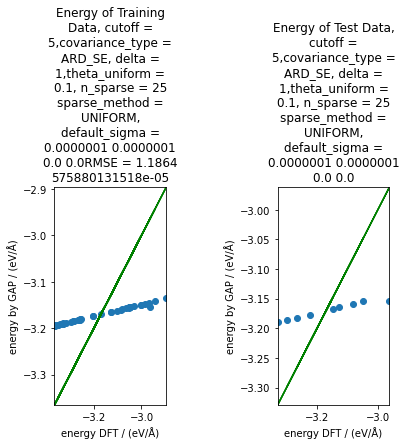

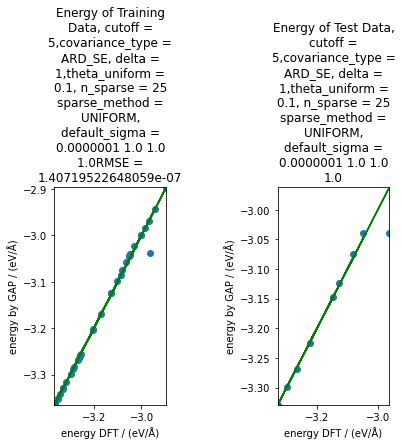

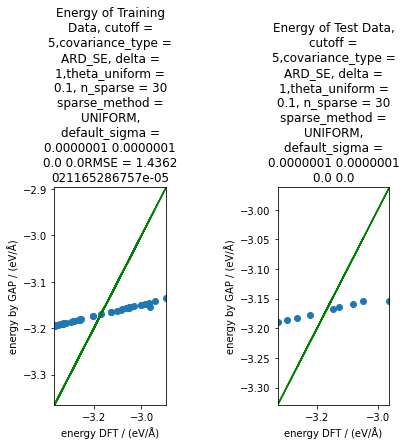

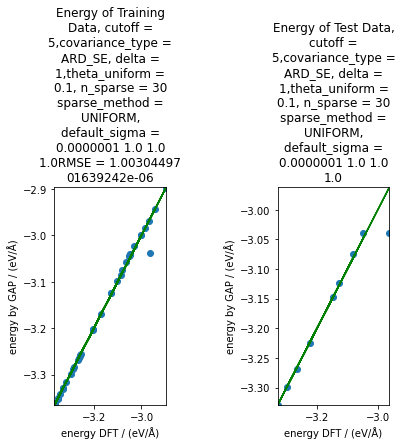

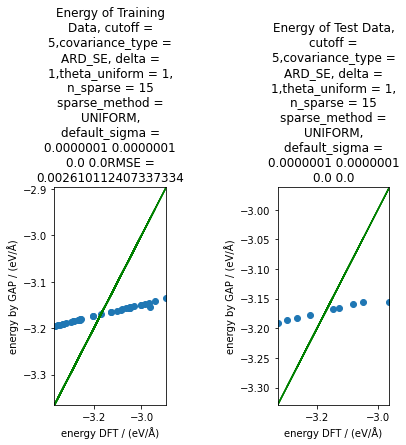

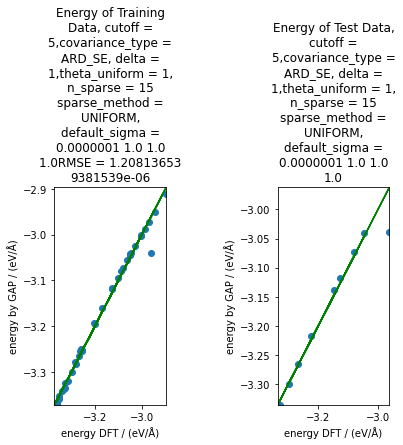

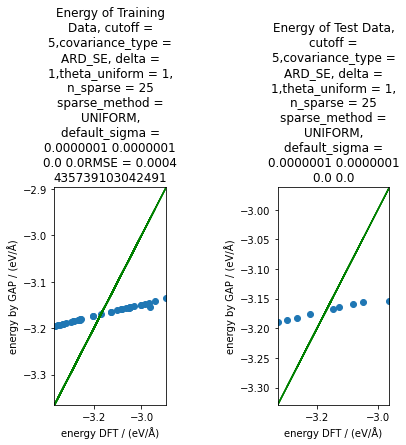

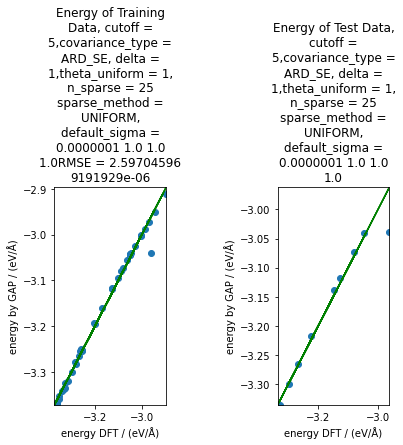

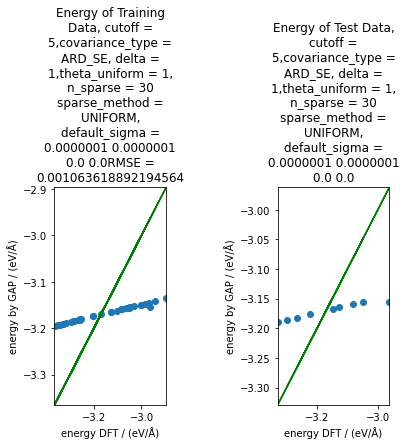

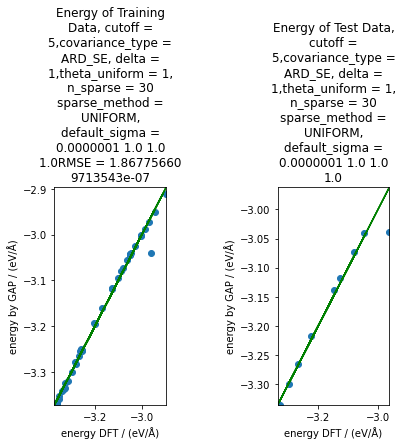

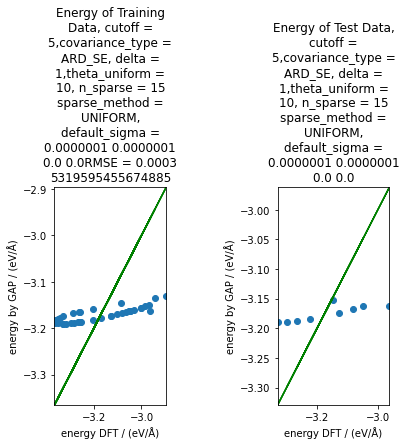

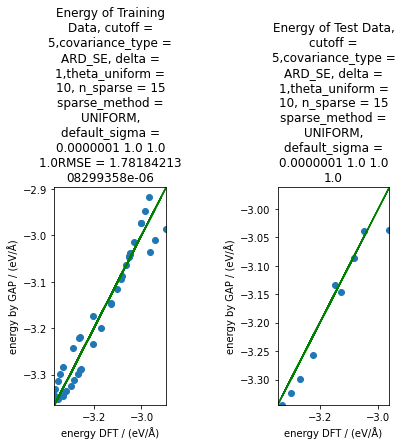

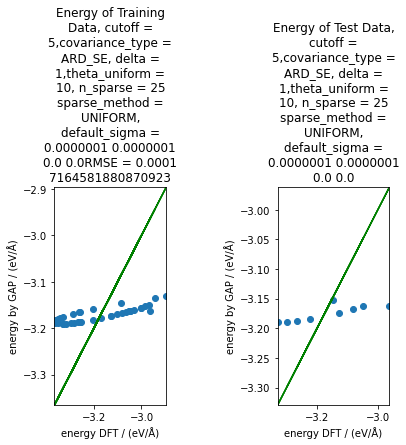

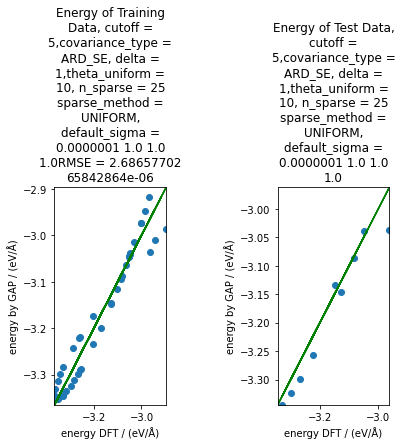

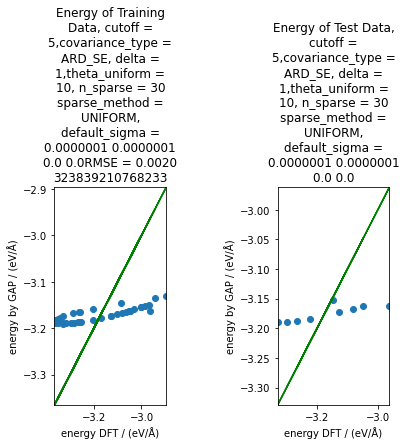

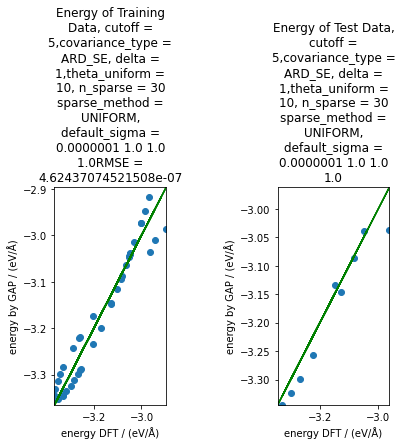

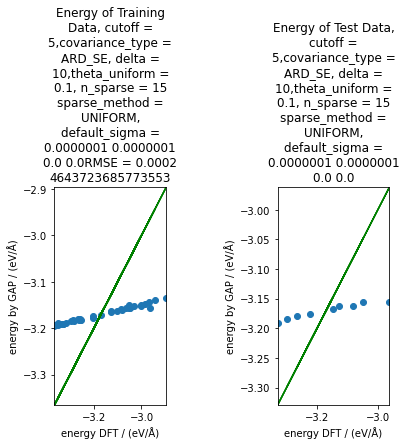

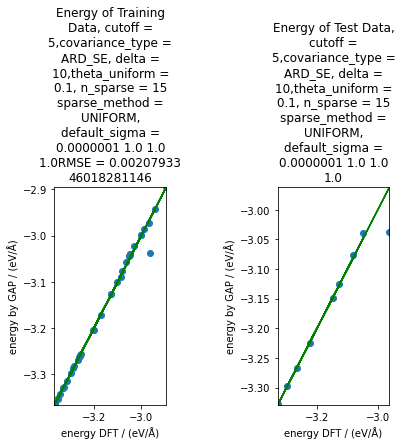

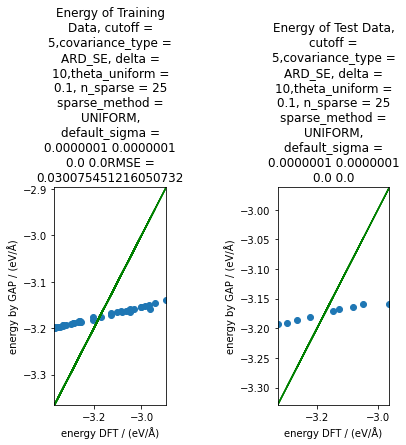

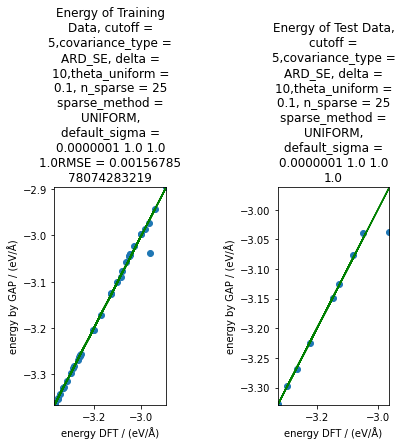

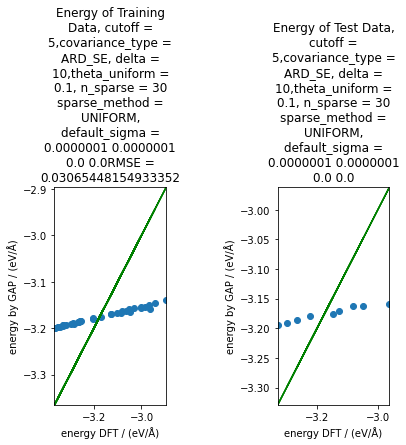

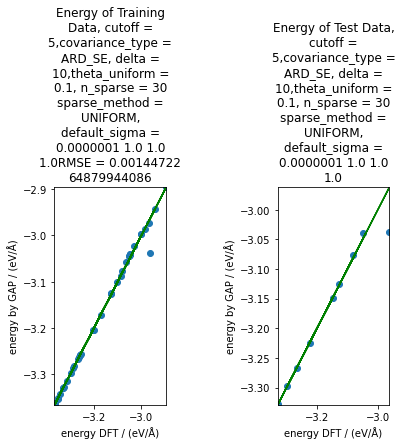

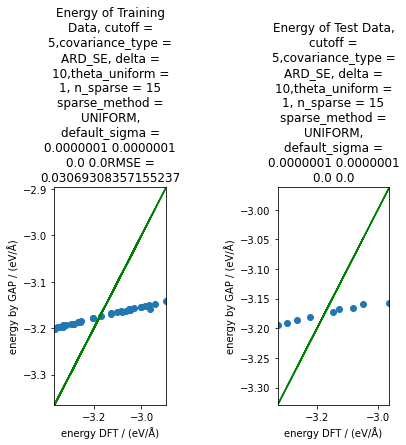

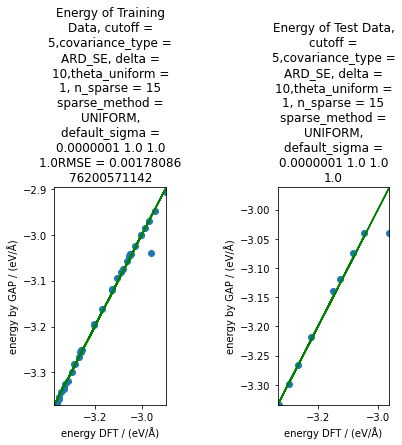

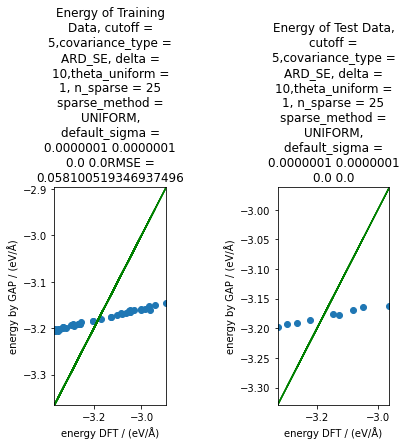

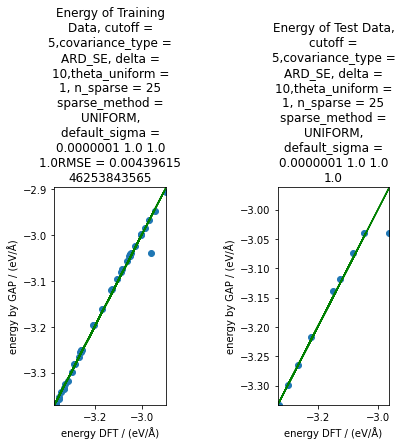

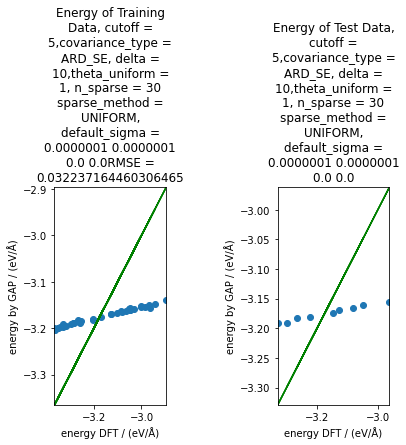

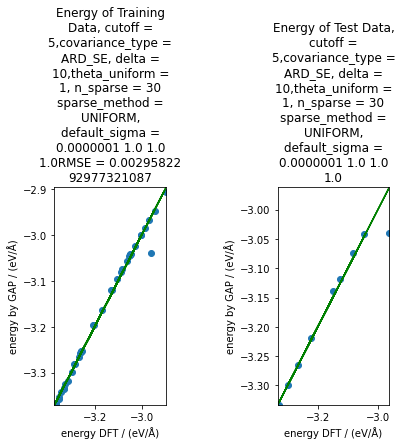

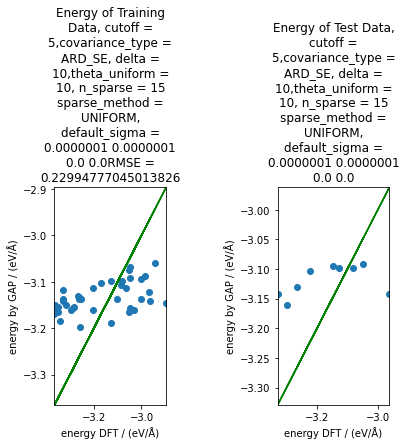

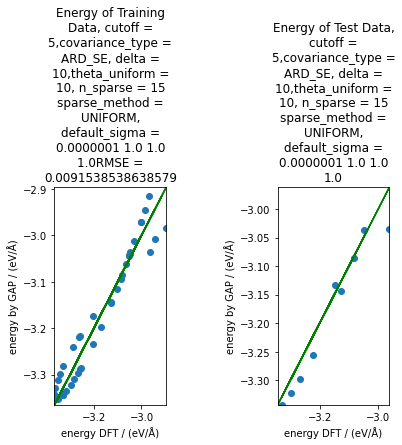

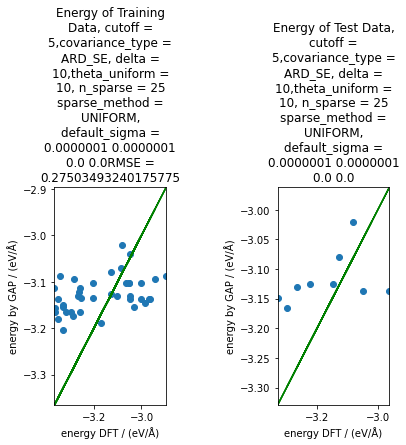

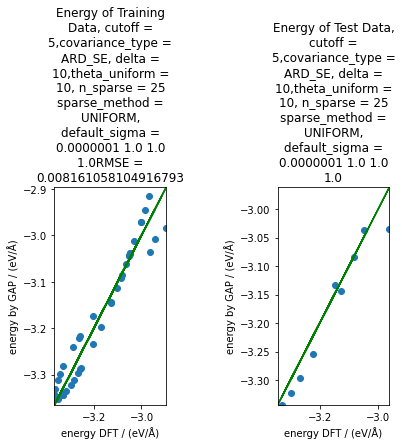

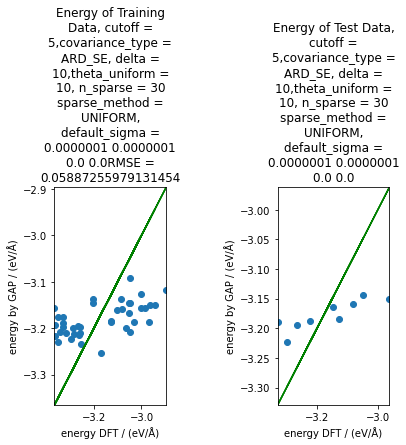

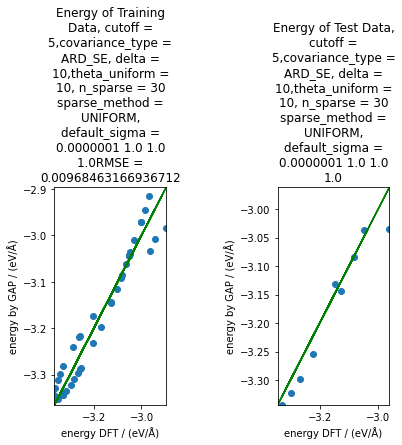

In [6]:
 for i,(cut,cov,delta,theta,nsparse,sparse,sigma) in enumerate(comb):
    # Plot ennergies to see quality of the fit
    plot = QualityPlot()
    RMSE = model.RMSE(train_file,f"quip_2b_train{i}.xyz")
    
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})
    
    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=train_file, predicted_values=f"quip_2b_train{i}.xyz", 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}"
                            f"RMSE = {RMSE}",20)))
    
    # Plot predicted energies of test data against real energies of test data
    plot.energies_on_energies(real_values=test_file, predicted_values=f"quip_2b_test{i}.xyz", 
                            axis=axs[1], 
                            title="\n".join(wrap(f"Energy of Test Data, cutoff = {cut},"
                            f"covariance_type = {cov}, delta = {delta},"
                            f"theta_uniform = {theta}, n_sparse = {nsparse} "
                            f"sparse_method = {sparse}, default_sigma = {sigma}",20)))
    
    
    
    from matplotlib.backends.backend_pdf import PdfPages
    with PdfPages(f"plot_test{i}.pdf") as pdf:
        pdf.savefig()

## Calculate RMSE and R2_Score 


In [7]:
f"RMSE = {model.RMSE(train_file,'quip_2b_train0.xyz')}"


'RMSE = 3.045796838560354e-07'

In [8]:
f"R2_score = {model.R2_Score(train_file,'quip_2b_train0.xyz')}"

'R2_score = 0.22998674792779217'